In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# os libraries
from pathlib import Path
import pickle
import os, glob

# Required Libraries

# Base Python Libraries
import json
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from collections import OrderedDict, Counter
import string
from ast import literal_eval

# Datetime utilities
import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import calendar

#Visualizations
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import matplotlib.dates as mdates

#Natural Language Processing (NLP)

import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation
from joblib import Parallel, delayed
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim
!pip install sentence_transformers
from gensim.models import CoherenceModel
from pprint import pprint
from gensim import corpora
nltk.download('all')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=7e9b532b138a808c04f8cad923ad2089e7878116b675e9b7ec397ba103c0f96a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
!pip install demoji
import demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.2 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
senwave_japan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets_Australia.csv')
print("Length of Senwave Japan Dataset = {}".format(len(senwave_japan)))

<ipython-input-5-7a51fee6b75e>:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  senwave_japan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets_Australia.csv')


Length of Senwave Japan Dataset = 3212464


In [6]:
senwave_japan.drop(senwave_japan.columns[0], axis=1, inplace = True)

In [7]:
senwave_japan.head()

,created_at,id,text,user_location
0,Wed Dec 08 04:25:46 +0000 2021,1468436616263909376.0,RT @AaronSiriSG: Litigation update: \n\nFDA d...,"Iasi, Romania"
1,Wed Dec 08 04:25:57 +0000 2021,1468436661633630208.0,RT @covidbaseau: The TGA has approved the Mode...,Canberra
2,Wed Dec 08 04:26:06 +0000 2021,1468436701043314688.0,RT @SimoLove: Federal Health Minister Greg Hun...,"Wurundjeri Richmond, Melbourne"
3,Wed Dec 08 04:26:07 +0000 2021,1468436704755286016.0,@twityouse Are these the deniers that are wear...,"Victoria, Australia"
4,Wed Dec 08 04:26:07 +0000 2021,1468436706424545280.0,RT @drsimonegold: WOW: a preprint study for Th...,Perth WA


In [8]:
senwave_japan['created_at'] = pd.to_datetime(senwave_japan['created_at'],  errors = 'coerce')

In [9]:
first_wave = senwave_japan[(senwave_japan['created_at'] >= '2020-04-01') & (senwave_japan['created_at'] <= '2021-02-28')].sample(n = 15000, random_state = 1)
second_wave = senwave_japan[(senwave_japan['created_at'] >= '2021-03-01') & (senwave_japan['created_at'] < '2021-06-30')].sample(n = 15000, random_state = 1)
third_wave = senwave_japan[(senwave_japan['created_at'] >= '2022-01-01') & (senwave_japan['created_at'] < '2022-02-28')].sample(n = 15000, random_state = 1)

senwave_japan = pd.concat([first_wave, second_wave, third_wave])

print(senwave_japan.shape)

senwave_japan.head()

(45000, 4)


,created_at,id,text,user_location
1549219,2021-02-01 21:44:05+00:00,1356357679384420354,RT @StacyMcGregor14: Laura Tingle asks Morriso...,New South Wales
1295759,2021-02-26 05:12:38+00:00,1365167870838075394,@ALeighMP Don’t forget a lot of that profit ca...,Melbourne
1165134,2021-02-08 11:25:50+00:00,1358738809081520130,RT @jones_lucy: *Communication during Covid-19...,The University of Nottingham
1590232,2021-02-04 12:53:24+00:00,1357311291228999685,RT @markdreyfusQCMP: Craig Kelly is at again -...,"Hobart, Tasmania"
1592476,2021-02-04 13:29:07+00:00,1357320280838873090,@newscientist Since several of the vaccines wo...,"Cape Tribulation, Queensland"


In [10]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english') + ['t', 'rt', 'ti', 'vk', 'to', 'co','dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd', 'http', 'https']
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [11]:
senwave_japan = senwave_japan[senwave_japan['user_location'].str.contains('AUS|Australia|Canberra|New South Wales|Albury-Wodonga|Armidale|Ballina|Balranald|Batemans Bay|Bathurst|Bega|Bourke|Bowral|Broken Hill|Byron Bay|Camden|Campbelltown|Cobar|Coffs Harbour|Cooma|Coonabarabran|Coonamble|Cootamundra|Corowa|Cowra|Deniliquin|Dubbo|Forbes|Forster|Glen Innes|Gosford|Goulburn|Grafton|Griffith|Gundagai|Gunnedah|Hay|Inverell|Junee|Katoomba|Kempsey|Kiama|Kurri Kurri|Lake Cargelligo|Lismore|Lithgow|Maitland|Moree|Moruya|Murwillumbah|Muswellbrook|Nambucca Heads|Narrabri|Narrandera|Newcastle|Nowra-Bomaderry|Orange|Parkes|Parramatta|Penrith|Port Macquarie|Queanbeyan|Raymond Terrace|Richmond|Scone|Singleton|Sydney|Tamworth|Taree|Temora|Tenterfield|Tumut|Ulladulla|Wagga Wagga|Wauchope|Wellington|West Wyalong|Windsor|Wollongong|Wyong|Yass|Young|Northern Territory|Alice Springs|Anthony Lagoon|Darwin|Katherine|Tennant Creek|Queensland|Ayr|Beaudesert|Blackwater|Bowen|Brisbane|Buderim|Bundaberg|Caboolture|Cairns|Charleville|Charters Towers|Cooktown|Dalby|Deception Bay|Emerald|Gatton|Gladstone|Gold Coast|Goondiwindi|Gympie|Hervey Bay|Ingham|Innisfail|Kingaroy|Mackay|Mareeba|Maroochydore|Maryborough|Moonie|Moranbah|Mount Isa|Mount Morgan|Moura|Redcliffe|Rockhampton|Roma|Stanthorpe|Toowoomba|Townsville|Warwick|Weipa|Winton|Yeppoon|South Australia|Adelaide|Ceduna|Clare|Coober Pedy|Gawler|Goolwa|Iron Knob|Leigh Creek|Loxton|Millicent|Mount Gambier|Murray Bridge|Naracoorte|Oodnadatta|Port Adelaide Enfield|Port Augusta|Port Lincoln|Port Pirie|Renmark|Victor Harbor|Whyalla|Tasmania|Beaconsfield|Bell Bay|Burnie|Devonport|Hobart|Kingston|Launceston|New Norfolk|Queenstown|Richmond|Rosebery|Smithton|Stanley|Ulverstone|Wynyard|Victoria|Albury-Wodonga|Ararat|Bacchus Marsh|Bairnsdale|Ballarat|Beechworth|Benalla|Bendigo|Castlemaine|Colac|Echuca|Geelong|Hamilton|Healesville|Horsham|Kerang|Kyabram|Kyneton|Lakes Entrance|Maryborough|Melbourne|Mildura|Moe|Morwell|Port Fairy|Portland|Sale|Sea Lake|Seymour|Shepparton|Sunbury|Swan Hill|Traralgon|Yarrawonga|Wangaratta|Warragul|Werribee|Wonthaggi|Western Australia|Broome|Bunbury|Busselton|Coolgardie|Dampier|Derby|Fremantle|Geraldton|Kalgoorlie|Kambalda|Katanning|Kwinana|Mandurah|Meekatharra|Mount Barker|Narrogin|Newman|Northam|Perth|Port Hedland|Tom Price|Wyndham')==True]

In [12]:
senwave_japan

,created_at,id,text,user_location
1549219,2021-02-01 21:44:05+00:00,1356357679384420354,RT @StacyMcGregor14: Laura Tingle asks Morriso...,New South Wales
1295759,2021-02-26 05:12:38+00:00,1365167870838075394,@ALeighMP Don’t forget a lot of that profit ca...,Melbourne
1590232,2021-02-04 12:53:24+00:00,1357311291228999685,RT @markdreyfusQCMP: Craig Kelly is at again -...,"Hobart, Tasmania"
1592476,2021-02-04 13:29:07+00:00,1357320280838873090,@newscientist Since several of the vaccines wo...,"Cape Tribulation, Queensland"
1276507,2021-02-24 15:51:37+00:00,1364603900100304901,You just a F clown and you know it https://t.c...,"Gold Coast,Ghana"
...,...,...,...,...
250261,2022-01-02 11:14:11+00:00,1477599097641058304,RT @SikhForTruth: Reminder: It's Tony Blair wh...,"Sydney, Australia"
249937,2022-01-02 11:07:43+00:00,1477597469236084737,@realCarrickRyan Or maybe it’s just the vaccin...,Melbourne
290588,2022-01-03 01:45:50+00:00,1477818453759197184.0,RT @RVAwonk: I was just talking about disinfor...,"Portland, Oregon"
238236,2022-01-02 06:39:09+00:00,1477529880203984896,What about self determination and if you reall...,"Melbourne, Australia"


In [13]:
words = clean(''.join(str(senwave_japan['text'].tolist())))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(new, case)'),
  Text(0, 1, '(federal, government)'),
  Text(0, 2, '(morrison, government)'),
  Text(0, 3, '(wear, mask)'),
  Text(0, 4, '(covid19, case)'),
  Text(0, 5, '(antigen, test)'),
  Text(0, 6, '(hotel, quarantine)'),
  Text(0, 7, '(covid, case)'),
  Text(0, 8, '(aged, care)'),
  Text(0, 9, '(rapid, antigen)'),
  Text(0, 10, '(covid, test)'),
  Text(0, 11, '(covid, vaccine)'),
  Text(0, 12, '(vaccine, rollout)'),
  Text(0, 13, '(covid19, vaccine)'),
  Text(0, 14, '(scott, morrison)')])

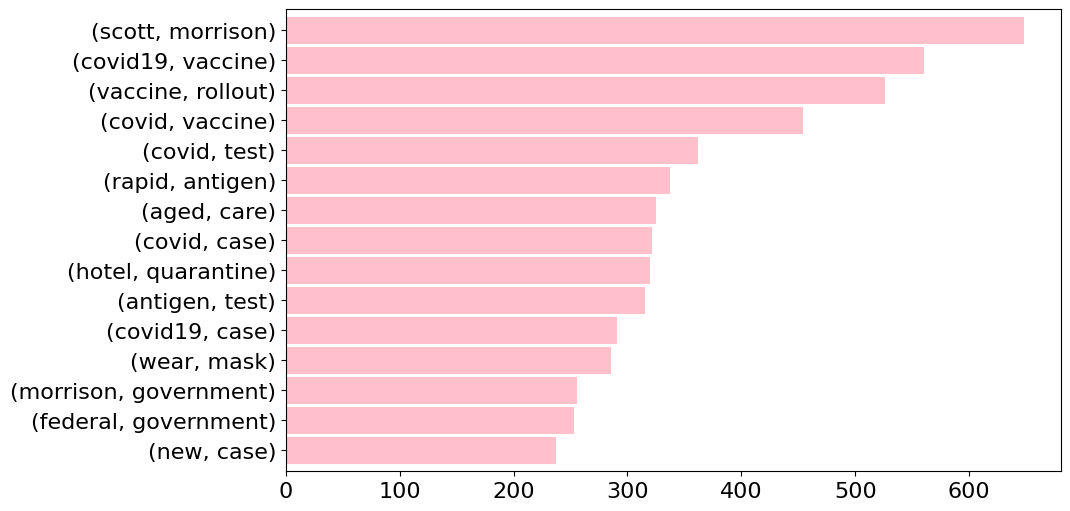

In [14]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'pink', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(around, making, everything)'),
  Text(0, 1, '(covid19, outbreak, preventing)'),
  Text(0, 2, '(current, uncontrolled, covid19)'),
  Text(0, 3, '(advice, current, uncontrolled)'),
  Text(0, 4, '(outbreak, preventing, transmission)'),
  Text(0, 5, '(helpful, advice, current)'),
  Text(0, 6, '(uncontrolled, covid19, outbreak)'),
  Text(0, 7, '(pandemic, cant, go)'),
  Text(0, 8, '(cant, go, around)'),
  Text(0, 9, '(make, everything, free)'),
  Text(0, 10, '(aged, care, home)'),
  Text(0, 11, '(stage, pandemic, cant)'),
  Text(0, 12, '(cant, make, everything)'),
  Text(0, 13, '(rapid, covid, test)'),
  Text(0, 14, '(rapid, antigen, test)')])

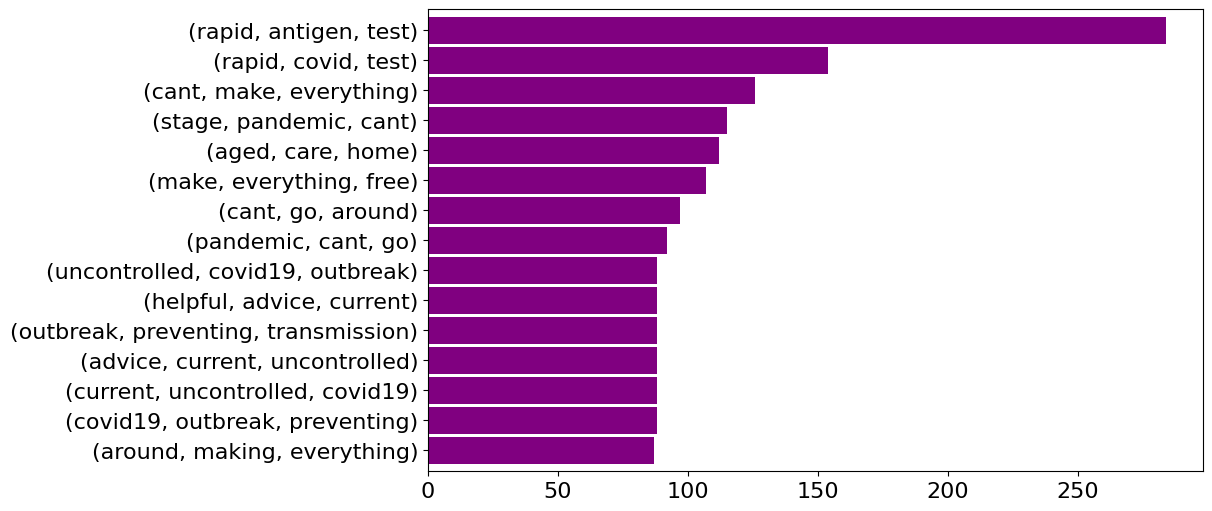

In [15]:
trigrams_series.sort_values().plot.barh(color = 'purple', width = 0.9, figsize = (10, 6))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

In [16]:
contractions = {
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

In [17]:
contractionsWithAnotherInvertedComma = {
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

In [18]:
class preprocess():
    def __init__(self, df, contractions, otherContractions):
        self.df = df
        self.contractions = contractions
        self.otherContractions = otherContractions

    def lower(self, tweet):
        return tweet.lower()

    def expand(self, tweet):
        for word in tweet.split():
            if word in self.contractions.keys():
                tweet = tweet.replace(word, self.contractions[word])
            elif word in self.otherContractions.keys():
                tweet = tweet.replace(word, self.otherContractions[word])
        return tweet

    def emoji2text(self, tweet):
        emojis = demoji.findall(tweet)
        new_tweet = []
        for word in tweet.split():
            if word in emojis.keys():
                tweet = tweet.replace(word, emojis[word])
                new_tweet.append(emojis[word])
            wordmojis = demoji.findall(word)
            for char in word:
                if char in wordmojis.keys():
                    tweet = tweet.replace(word, wordmojis[char])

        return tweet

    def remove_hashtags(self, tweet):
        return re.sub(r'\#w+', '', tweet)

    def remove_mentions(self, tweet):
        for word in tweet.split():
            if word[0] == '@':
                tweet = tweet.replace(word, '')
        return tweet

    def remove_punctuations(self, tweet):
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')
        return tweet.translate(trantab)

    def preprocess_tweet(self, tweet):
        tweet = str(tweet).lower()
        tweet = self.expand(tweet)
        tweet = self.emoji2text(tweet)
        tweet = self.remove_mentions(tweet)
        tweet = self.remove_hashtags(tweet)
        tweet = self.remove_punctuations(tweet)
        return tweet

In [19]:
pp_class = preprocess(senwave_japan, contractions, contractionsWithAnotherInvertedComma)
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : pp_class.preprocess_tweet(x))

In [20]:
senwave_japan

,created_at,id,text,user_location
1549219,2021-02-01 21:44:05+00:00,1356357679384420354,rt laura tingle asks morrison isn t it wastin...,New South Wales
1295759,2021-02-26 05:12:38+00:00,1365167870838075394,do not forget a lot of that profit came from ...,Melbourne
1590232,2021-02-04 12:53:24+00:00,1357311291228999685,rt craig kelly is at again tweeting on covi...,"Hobart, Tasmania"
1592476,2021-02-04 13:29:07+00:00,1357320280838873090,since several of the vaccines work on complet...,"Cape Tribulation, Queensland"
1276507,2021-02-24 15:51:37+00:00,1364603900100304901,you just a f clown and you know it https t c...,"Gold Coast,Ghana"
...,...,...,...,...
250261,2022-01-02 11:14:11+00:00,1477599097641058304,rt reminder it is tony blair who has been gu...,"Sydney, Australia"
249937,2022-01-02 11:07:43+00:00,1477597469236084737,or maybe it is just the vaccine working you ...,Melbourne
290588,2022-01-03 01:45:50+00:00,1477818453759197184.0,rt i was just talking about disinformation ta...,"Portland, Oregon"
238236,2022-01-02 06:39:09+00:00,1477529880203984896,what about self determination and if you reall...,"Melbourne, Australia"


In [21]:
def word_replace(tweet):
  tweet = tweet.replace("indiavscorona", "india versus coronavirus")
  tweet = tweet.replace("outbreakindia", "outbreak india")
  tweet = tweet.replace("real”", "real")
  tweet = tweet.replace("mutra", "urine")
  tweet = tweet.replace("fakenews", "fake news")
  tweet = tweet.replace("“omg", "oh my god")
  tweet = tweet.replace("“damn", "damn")
  tweet = tweet.replace("god’s", "gods")
  tweet = tweet.replace("lockdownextension", "lockdown extension")
  tweet = tweet.replace("कोरोना", "coronavirus")
  tweet = tweet.replace("indiathanks", "india thanks")
  tweet = tweet.replace("coronacoronavirus", "coronavirus")
  tweet = tweet.replace('coronavirusinsa', "coronavirus in south africa")
  tweet = tweet.replace('coronaviruscanada', 'coronavirus canada')
  tweet = tweet.replace('coronavirusau', 'coronavirus australia')
  tweet = tweet.replace('coronavirusaus', 'coronavirus australia')
  tweet = tweet.replace('cuomoprimetime', 'new york governor prime time')
  tweet = tweet.replace('letsfightcoronavirus', 'let us fight coronavirus')
  tweet = tweet.replace("covid19", "coronavirus")
  tweet = tweet.replace("covid", "coronavirus")
  tweet = tweet.replace("aprilfoolsday", "april fools day")
  tweet = tweet.replace("covidー19", "coronavirus")
  tweet = tweet.replace("stayathome", "stay at home")
  tweet = tweet.replace("“april", "april")
  tweet = tweet.replace("“i", "i")
  tweet = tweet.replace("aprilfools", "april fools")
  tweet = tweet.replace("coronavirusoutbreak", "coronavirus outbreak")
  tweet = tweet.replace("virusー19", "coronavirus")
  tweet = tweet.replace("fool’s", "fools")
  tweet = tweet.replace("what’s", "what is")
  tweet = tweet.replace("coronavirus”", "coronavirus")
  tweet = tweet.replace("fools”", "fools")
  tweet = tweet.replace("stayhome", "stay home")
  tweet = tweet.replace("quarantinelife", "quarantine life")
  tweet = tweet.replace("tablighijamaat", "muslims")
  tweet = tweet.replace("corona”", "coronavirus")
  tweet = tweet.replace("fauci", "physician")
  tweet = tweet.replace("april’s", "april")
  tweet = tweet.replace("pmkcallscurfewextension", "prime minister calls for curfew extension")
  tweet = tweet.replace("“virus", "coronavirus")
  tweet = tweet.replace("virus”", "coronavirus")
  tweet = tweet.replace("“corona", "coronavirus")
  tweet = tweet.replace("coronavirustruth", "coronavirus truth")
  tweet = tweet.replace("socialdistancing", "social distancing")
  tweet = tweet.replace("homestaysafe", "home stay safe")
  tweet = tweet.replace("“coronavirus", "coronavirus")
  tweet = tweet.replace("coronavirusupdate", "coronavirus update")
  tweet = tweet.replace("virusvirus", "coronavirus")
  tweet = tweet.replace("coronaviruspandemic", "coronavirus pandemic")
  tweet = tweet.replace("thelockdown", "the lockdown")
  tweet = tweet.replace("nizamuddin", "delhi")
  tweet = tweet.replace("trump’s", "donald trump")
  tweet = tweet.replace("“the", "the")
  tweet = tweet.replace("virus2019", "coronavirus")
  tweet = tweet.replace("indiafightscorona", "india fights coronavirus")
  tweet = tweet.replace("homesavelives", "home save lives")
  tweet = tweet.replace("everyone’s", "everyone")
  tweet = tweet.replace("coronariskforprisoners", "coronavirus risk for prisoners")
  tweet = tweet.replace("coronavirususa", "coronavirus usa")
  tweet = tweet.replace("tablighi", "mosque")
  tweet = tweet.replace("delhimarkaz", "delhi mosque")
  tweet = tweet.replace("coronajihad", "coronavirus struggle")
  tweet = tweet.replace("coronajihaad", "coronavirus struggle")
  tweet = tweet.replace("aprilfool", "april fool")
  tweet = tweet.replace("trumppressconference", "trump press conference")
  tweet = tweet.replace("i’m", "i am")
  tweet = tweet.replace("tigerking", "tiger king")
  tweet = tweet.replace("it’s", "it is")
  tweet = tweet.replace("trumpvirus", "trump virus")
  tweet = tweet.replace("today’s", "today is")
  tweet = tweet.replace("“you", "you")
  tweet = tweet.replace("“a", "a")
  tweet = tweet.replace("fools’", "fools")
  tweet = tweet.replace("rtgnews", "news")
  tweet = tweet.replace("19india", "india")
  tweet = tweet.replace("coronavirusindia", "coronavirus india")
  tweet = tweet.replace("y’all", "you all")
  tweet = tweet.replace("मीडिया", "media")
  tweet = tweet.replace("here’s", "here is")
  tweet = tweet.replace("“we", "we")
  tweet = tweet.replace("“fuck", "fuck")
  tweet = tweet.replace("flattenthecurve", "flatten the curve")
  tweet = tweet.replace("jammuandkashmir", "jammu and kashmir")
  tweet = tweet.replace("chriscuomo", "new york governor")
  tweet = tweet.replace("‘april", "april")
  tweet = tweet.replace("dranbumani", "doctor")
  tweet = tweet.replace("tndemandsmasstesting", "tamil nadu demands mass testing")
  tweet = tweet.replace("tabligi", "muslims")
  tweet = tweet.replace("don’t", "do not")
  tweet = tweet.replace("वायरस", "virus")
  tweet = tweet.replace("letsfightvirus", "let us fight virus")
  return tweet

In [22]:
senwave_japan['text'] = senwave_japan['text'].apply(lambda x : word_replace(x))

In [23]:
# from google.colab import files
# senwave_japan.to_csv('senwave_japan.csv')
# files.download('senwave_japan.csv')

In [24]:
senwave_japan

,created_at,id,text,user_location
1549219,2021-02-01 21:44:05+00:00,1356357679384420354,rt laura tingle asks morrison isn t it wastin...,New South Wales
1295759,2021-02-26 05:12:38+00:00,1365167870838075394,do not forget a lot of that profit came from ...,Melbourne
1590232,2021-02-04 12:53:24+00:00,1357311291228999685,rt craig kelly is at again tweeting on coro...,"Hobart, Tasmania"
1592476,2021-02-04 13:29:07+00:00,1357320280838873090,since several of the vaccines work on complet...,"Cape Tribulation, Queensland"
1276507,2021-02-24 15:51:37+00:00,1364603900100304901,you just a f clown and you know it https t c...,"Gold Coast,Ghana"
...,...,...,...,...
250261,2022-01-02 11:14:11+00:00,1477599097641058304,rt reminder it is tony blair who has been gu...,"Sydney, Australia"
249937,2022-01-02 11:07:43+00:00,1477597469236084737,or maybe it is just the vaccine working you ...,Melbourne
290588,2022-01-03 01:45:50+00:00,1477818453759197184.0,rt i was just talking about disinformation ta...,"Portland, Oregon"
238236,2022-01-02 06:39:09+00:00,1477529880203984896,what about self determination and if you reall...,"Melbourne, Australia"


In [25]:
stop_words = stopwords.words('english') + ['t', 'rt', 'ti', 'vk', 'to', 'co','dqlw', 'z', 'nd', 'm', 's', 'kur', 'u', 'o', 'd', 'http', 'https']
senwave_japan['text'] = senwave_japan['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [26]:
senwave_japan

,created_at,id,text,user_location
1549219,2021-02-01 21:44:05+00:00,1356357679384420354,laura tingle asks morrison wasting taxpayer mo...,New South Wales
1295759,2021-02-26 05:12:38+00:00,1365167870838075394,forget lot profit came people jobseeker spendi...,Melbourne
1590232,2021-02-04 12:53:24+00:00,1357311291228999685,craig kelly tweeting coronavirus less two days...,"Hobart, Tasmania"
1592476,2021-02-04 13:29:07+00:00,1357320280838873090,since several vaccines work completely diffire...,"Cape Tribulation, Queensland"
1276507,2021-02-24 15:51:37+00:00,1364603900100304901,f clown know px6he118jo,"Gold Coast,Ghana"
...,...,...,...,...
250261,2022-01-02 11:14:11+00:00,1477599097641058304,reminder tony blair guiding government coronav...,"Sydney, Australia"
249937,2022-01-02 11:07:43+00:00,1477597469236084737,maybe vaccine working cannot ignore case numbe...,Melbourne
290588,2022-01-03 01:45:50+00:00,1477818453759197184.0,talking disinformation tactics strategically s...,"Portland, Oregon"
238236,2022-01-02 06:39:09+00:00,1477529880203984896,self determination really question ask them” a...,"Melbourne, Australia"


In [27]:
# Subset data based on timeframes for alpha, delta and omicron

In [28]:
total_japan = senwave_japan.copy()

In [29]:
print(total_japan[total_japan['created_at'] < '2022-01-01']['created_at'].min())

first_wave = total_japan[(total_japan['created_at'] >= '2020-04-01') & (total_japan['created_at'] <= '2021-02-28')]
second_wave = total_japan[(total_japan['created_at'] >= '2021-03-01') & (total_japan['created_at'] < '2021-06-30')]
third_wave = total_japan[(total_japan['created_at'] >= '2022-01-01') & (total_japan['created_at'] < '2022-02-28')]

print(first_wave.shape, second_wave.shape, third_wave.shape)

2021-02-01 04:25:55+00:00
(12211, 4) (12387, 4) (13720, 4)


In [30]:
# First Wave

In [31]:
# Tokenizing

freqX = pd.Series(' '.join(first_wave['text']).split()).value_counts()[:10]

print('FREQ X: \n', freqX)

FREQ X: 
 coronavirus    4390
vaccine        1787
19             1285
pandemic       1151
people          900
amp             893
new             700
quarantine      699
get             695
vaccines        660
dtype: int64


In [32]:
first_wave['text'] = first_wave['text'].apply(lambda x: [item for item in x.split()])
first_wave['text']

<ipython-input-32-287160392d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_wave['text'] = first_wave['text'].apply(lambda x: [item for item in x.split()])


1549219    [laura, tingle, asks, morrison, wasting, taxpa...
1295759    [forget, lot, profit, came, people, jobseeker,...
1590232    [craig, kelly, tweeting, coronavirus, less, tw...
1592476    [since, several, vaccines, work, completely, d...
1276507                         [f, clown, know, px6he118jo]
                                 ...                        
1557589    [think, people, programmed, coronavirus, model...
1243003    [rate, development, compromise, change, standa...
1250490    [start, coronavirus, vaccination, rollout, say...
1164179    [scrolled, names, americans, died, pandemic, w...
1577838    [coronavirus, test, nurse, asked, sudden, loss...
Name: text, Length: 12211, dtype: object

In [33]:
sentence_list = [sent for sent in first_wave['text']]
print(sentence_list[:10])

[['laura', 'tingle', 'asks', 'morrison', 'wasting', 'taxpayer', 'money', 'running', 'advertising', 'campaign', 'vaccines', 'members…'], ['forget', 'lot', 'profit', 'came', 'people', 'jobseeker', 'spending', 'money', 'stores', 'coronavirus', 'payment', 'double', 'dipping', 'govt', 'coffers'], ['craig', 'kelly', 'tweeting', 'coronavirus', 'less', 'two', 'days', 'mr', 'morrison', '‘hauled', 'in’', '‘dressing', 'down’…'], ['since', 'several', 'vaccines', 'work', 'completely', 'diffirent', 'principles', 'would', 'wildly', 'optimistic', 'working'], ['f', 'clown', 'know', 'px6he118jo'], ['want', 'dig', 'exodus', 'check', 'weekly', 'discipleship', 'guides', 'mi86zi4ne1'], ['meeting', 'gop', 'senators', 'led', 'coronavirus', 'relief', 'package', 'rfy3gqdj2j', 'j8tk7e48es'], ['latest', 'podcast', 'looks', 'pandemic', 'changed', 'student', 'preferences', 'learning', 'models', 'well', 'challenges', 'universities', 'face', 'providing', 'value', 'evolving', 'online', 'learning', 'world', '9bpnw91kns

In [34]:
word_list = [sent for sent in sentence_list]
print(word_list[:10])

[['laura', 'tingle', 'asks', 'morrison', 'wasting', 'taxpayer', 'money', 'running', 'advertising', 'campaign', 'vaccines', 'members…'], ['forget', 'lot', 'profit', 'came', 'people', 'jobseeker', 'spending', 'money', 'stores', 'coronavirus', 'payment', 'double', 'dipping', 'govt', 'coffers'], ['craig', 'kelly', 'tweeting', 'coronavirus', 'less', 'two', 'days', 'mr', 'morrison', '‘hauled', 'in’', '‘dressing', 'down’…'], ['since', 'several', 'vaccines', 'work', 'completely', 'diffirent', 'principles', 'would', 'wildly', 'optimistic', 'working'], ['f', 'clown', 'know', 'px6he118jo'], ['want', 'dig', 'exodus', 'check', 'weekly', 'discipleship', 'guides', 'mi86zi4ne1'], ['meeting', 'gop', 'senators', 'led', 'coronavirus', 'relief', 'package', 'rfy3gqdj2j', 'j8tk7e48es'], ['latest', 'podcast', 'looks', 'pandemic', 'changed', 'student', 'preferences', 'learning', 'models', 'well', 'challenges', 'universities', 'face', 'providing', 'value', 'evolving', 'online', 'learning', 'world', '9bpnw91kns

In [35]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
word_list_lematized = []

for w in word_list:
    word_list_lematized.append([lemmatizer.lemmatize(x) for x in w])
print(word_list_lematized[:10])

[['laura', 'tingle', 'asks', 'morrison', 'wasting', 'taxpayer', 'money', 'running', 'advertising', 'campaign', 'vaccine', 'members…'], ['forget', 'lot', 'profit', 'came', 'people', 'jobseeker', 'spending', 'money', 'store', 'coronavirus', 'payment', 'double', 'dipping', 'govt', 'coffer'], ['craig', 'kelly', 'tweeting', 'coronavirus', 'le', 'two', 'day', 'mr', 'morrison', '‘hauled', 'in’', '‘dressing', 'down’…'], ['since', 'several', 'vaccine', 'work', 'completely', 'diffirent', 'principle', 'would', 'wildly', 'optimistic', 'working'], ['f', 'clown', 'know', 'px6he118jo'], ['want', 'dig', 'exodus', 'check', 'weekly', 'discipleship', 'guide', 'mi86zi4ne1'], ['meeting', 'gop', 'senator', 'led', 'coronavirus', 'relief', 'package', 'rfy3gqdj2j', 'j8tk7e48es'], ['latest', 'podcast', 'look', 'pandemic', 'changed', 'student', 'preference', 'learning', 'model', 'well', 'challenge', 'university', 'face', 'providing', 'value', 'evolving', 'online', 'learning', 'world', '9bpnw91kns', 'onlinelearni

In [36]:
# ID and text for Topic models

In [37]:
# Create dictionary which contains Id and word
id2word = corpora.Dictionary(word_list_lematized)
corpus = [id2word.doc2bow(tweet) for tweet in word_list]

print(np.array(word_list).shape)
print(np.array(id2word).shape)
print(np.array(corpus).shape)

(12211,)
(22279,)
(12211,)


<ipython-input-37-5486978e3ee1>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(word_list).shape)
<ipython-input-37-5486978e3ee1>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(corpus).shape)


In [38]:
# LDA

In [39]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                            id2word=id2word,
                                            num_topics=7,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [40]:
# Show Topics

pprint(lda_model.show_topics(num_words=20, num_topics=-1, formatted=False))
print('-'*100)

pprint(lda_model.show_topics(formatted=True))
print('-'*100)

print('\nPerplexity: ', lda_model.log_perplexity(corpus))
print('-'*100)

doc_lda = lda_model[corpus]
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n LDA model Coherence Score/Accuracy on Tweets: ', coherence_lda)

[(0,
  [('quarantine', 0.028427495),
   ('australia', 0.025738236),
   ('health', 0.020308085),
   ('000', 0.012429685),
   ('also', 0.011777609),
   ('well', 0.011409863),
   ('test', 0.010920779),
   ('see', 0.010704117),
   ('hotel', 0.010545515),
   ('still', 0.008828275),
   ('world', 0.008660022),
   ('pfizer', 0.008473672),
   ('take', 0.008067547),
   ('post', 0.0073192855),
   ('minister', 0.007099205),
   ('real', 0.0070295245),
   ('community', 0.0070264107),
   ('job', 0.0069145705),
   ('auspol', 0.0068771024),
   ('safe', 0.0067107067)]),
 (1,
  [('morrison', 0.03982714),
   ('rollout', 0.028442541),
   ('two', 0.016518967),
   ('craig', 0.015714396),
   ('safety', 0.014319552),
   ('kelly', 0.013873077),
   ('wa', 0.013203903),
   ('scott', 0.010156583),
   ('read', 0.009690916),
   ('zero', 0.009556882),
   ('t…', 0.00942139),
   ('look', 0.0092159165),
   ('trade', 0.008982674),
   ('taking', 0.008471439),
   ('yet', 0.00822638),
   ('supe…', 0.008184647),
   ('scrolle

In [41]:
# hyper parameter tuning - LDA model

In [42]:
# BERT Model

In [43]:
!pip install --upgrade bertopic[visualization]
from bertopic import BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039173 sha256=125fca6b663d4a1ce94b90f7407d01f3bd3094fd43d0a327fdf7718f31a3200d
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=c4b55162f33365e9

In [44]:
BERT_first_wave = total_japan[(total_japan['created_at'] >= '2020-04-01') & (total_japan['created_at'] <= '2021-02-28')]

In [45]:
bert_model = BERTopic(language="english")
topics, probabilities = bert_model.fit_transform(BERT_first_wave['text'])

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [46]:
bert_model.get_topic_freq().head()

,Topic,Count
1,-1,5266
4,0,329
3,1,218
17,2,157
80,3,142


In [47]:
bert_model.get_topic(1)

[('vaccine', 0.02807069133990433),
 ('vaccines', 0.016353994730354322),
 ('getting', 0.00968821481118936),
 ('soon', 0.00958720352820846),
 ('taking', 0.009313021143265827),
 ('polio', 0.009206331191932378),
 ('vaccinated', 0.009027702521879469),
 ('get', 0.008954345517740082),
 ('immunity', 0.007898357192709368),
 ('take', 0.0077051380369695345)]

In [48]:
bert_model.visualize_topics()

In [49]:
bert_model.update_topics(BERT_first_wave['text'], topics, n_gram_range=(1, 2))

In [50]:
topics, probabilities = bert_model.fit_transform(BERT_first_wave['text'])

In [51]:
bert_model.visualize_topics()

In [52]:
bert_model.visualize_barchart(top_n_topics=6)

In [53]:
bert_model.visualize_hierarchy(top_n_topics=30)

In [54]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.1 MB/s eta 0:00:00


In [55]:
import seaborn as sns
import networkx as nx
import umap

In [56]:
import json, os, re, time,regex
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from natsort import natsorted
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
import gensim

from pprint import pprint
from gensim import corpora

In [57]:
!pip install top2vec
!pip install top2vec[sentence_encoders] --use-deprecated=legacy-resolver
!pip install top2vec[sentence_transformers]

In [58]:
import seaborn as sns
import networkx as nx
import umap

In [59]:
!pip install git+https://github.com/scikit-learn-contrib/hdbscan.git

  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-req-build-_8sler1g
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-req-build-_8sler1g
  Resolved https://github.com/scikit-learn-contrib/hdbscan.git to commit 98928d0c095715edc9584e7989bd8559673bc2f0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.34rc1-cp310-cp310-linux_x86_64.whl size=3039026 sha256=1f4625ba3b9faf067d9cac9443b94575347ba26fafbc22450c2d8f07d1afde21
  Stored in directory: /tmp/pip-ephem-wheel-cache-1lo87vmf/wheels/dd/9a/ab/564a6c3e58f76c492ab1104d636e794e2fe7b879ba02e344d2
Successfully built hdbscan
  Attempting uninstall: hdbscan
    Found existing installation: hdbscan 0.8.33
    Uninstalling hdbscan-0.8.33:
      Successfully uninstalled hdbscan-0.8.33


In [60]:
import hdbscan
from top2vec import Top2Vec

In [61]:
first_wave['text_'] = first_wave['text'].astype("string")

In [62]:
first_wave.dtypes

created_at       datetime64[ns, UTC]
id                            object
text                          object
user_location                 object
text_                         string
dtype: object

In [63]:
model_first = Top2Vec(first_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')

2023-12-17 15:02:23,171 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 15:02:24,288 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 15:03:03,972 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 15:03:12,014 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 15:03:33,279 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 15:03:33,901 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [64]:
model_first.topic_words

array([['vaccines', 'vaccine', 'vaccinations', ..., 'say', 'healthcare',
        'already'],
       ['pandemic', 'outbreak', 'quarantine', ..., 'already', 'million',
        'global'],
       ['vaccinations', 'vaccination', 'vaccinated', ..., 'news',
        'patients', 'yet'],
       ...,
       ['craig', 'parliament', 'biden', ..., 'quarantine', 'journalist',
        'leave'],
       ['vaccinations', 'vaccinated', 'vaccines', ..., 'feb',
        'republicans', 'went'],
       ['mask', 'masks', 'save', ..., 'doctor', 'days', 'safe']],
      dtype='<U14')

In [65]:
model_first.get_topic_sizes()

(array([1242,  654,  501,  448,  358,  311,  295,  260,  253,  229,  225,
         224,  207,  194,  185,  173,  172,  172,  170,  158,  157,  151,
         145,  144,  141,  132,  128,  125,  122,  116,  115,  110,  105,
         101,   99,   98,   97,   96,   94,   92,   88,   86,   84,   84,
          84,   80,   79,   77,   75,   75,   74,   74,   70,   69,   68,
          67,   65,   65,   64,   63,   62,   60,   60,   59,   57,   57,
          57,   56,   55,   53,   52,   52,   50,   48,   48,   47,   47,
          45,   44,   44,   42,   41,   41,   41,   41,   40,   40,   39,
          39,   37,   36,   36,   34,   33,   32,   32,   30,   28,   27,
          26,   25,   24,   23,   22,   21,   19,   19]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,

In [66]:
topic_sizes, topic_nums = model_first.get_topic_sizes()

In [67]:
topic_words, word_scores, topic_nums = model_first.get_topics(20)

In [68]:
model_first_reduced= model_first.hierarchical_topic_reduction(num_topics = 10)

In [69]:
model_first.save("/content/model_first_reduced")

In [70]:
model_first_reduced= model_first.load("/content/model_first_reduced")

In [71]:
model_first.get_num_topics(reduced ="True")

10

In [72]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [73]:
words, _, _= get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first, _, _ = get_words(model_first_reduced, 20, model_first_reduced.get_num_topics())
words_first

array([['vaccines', 'vaccinations', 'vaccine', 'vaccinated',
        'vaccination', 'jab', 'flu', 'immunity', 'quarantine',
        'pandemic', 'outbreak', 'pfizer', 'doses', 'anti', 'facebook',
        'coronavirus', 'infected', 'shot', 'virus', 'sick'],
       ['lockdown', 'lnp', 'gov', 'govt', 'misinformation', 'really',
        'biden', 'wrong', 'bad', 'enough', 'worst', 'liberal', 'crisis',
        'abc', 'seems', 'non', 'government', 'dangerous', 'poor',
        'already'],
       ['pandemic', 'outbreak', 'quarantine', 'flu', 'risk', 'deaths',
        'crisis', 'masks', 'virus', 'vaccinated', 'vaccinations',
        'vaccines', 'vaccine', 'infected', 'vaccination', 'population',
        'everyone', 'mask', 'death', 'sick'],
       ['update', 'tested', 'outbreak', 'new', 'positive', 'news',
        'working', 'quarantine', 'tests', 'sick', 'misinformation',
        'monday', 'yesterday', 'study', 'already', 'need', 'testing',
        'test', 'done', 'flu'],
       ['happy', 'sick'

In [74]:
model_first.topic_words[21]

array(['doctor', 'dr', 'experts', 'science', 'misinformation', 'pfizer',
       'medical', 'quarantine', 'dangerous', 'patients', 'really',
       'vaccines', 'pandemic', 'wrong', 'sick', 'virus', 'vaccinations',
       'infected', 'gov', 'everyone', 'lnp', 'hospital', 'republicans',
       'healthcare', 'andrews', 'vaccine', 'trump', 'vaccinated',
       'mental', 'taxpayer', 'thank', 'immunity', 'outbreak', 'govt',
       'health', 'fact', 'biden', 'said', 'worst', 'vaccination', 'half',
       'abc', 'bad', 'anti', 'seems', 'absolutely', 'private',
       'coronavirus', 'weeks', 'jab'], dtype='<U14')

In [75]:
# second wave

In [76]:
second_wave['text_'] = second_wave['text'].astype("string")
model_second = Top2Vec(second_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')
model_second.get_num_topics()

2023-12-17 15:03:50,642 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 15:03:52,263 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 15:04:07,484 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 15:04:15,719 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 15:04:42,075 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 15:04:42,918 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


86

In [77]:
# umap_args = {'n_neighbors': 10,
#              'n_components': 5,
#              'metric': 'cosine',
#              "random_state": 42
#              }
# hdbscan_args = {'min_cluster_size': 10,
#                 'min_samples':5,
#                 'metric': 'euclidean',
#                 'cluster_selection_method': 'eom'
#              }
# model_secondwave = Top2Vec(documents = second_wave['text_'].to_list(), embedding_model='distiluse-base-multilingual-cased', umap_args = umap_args, hdbscan_args = hdbscan_args)
# model_secondwave.get_num_topics()

In [78]:
model_second.get_num_topics()

86

In [79]:
# umap_args = {
#       "n_neighbors": 10,
#       "n_components": 2, # 5 -> 2 for plotting
#       "metric": "cosine",
#       "random_state":42
#       }
# umap_data = umap.UMAP(**umap_args).fit_transform(model_second._get_document_vectors(norm=False))

In [80]:
model_second.get_topic_sizes()

(array([941, 773, 598, 426, 407, 379, 361, 319, 311, 297, 270, 248, 247,
        241, 233, 226, 226, 215, 204, 187, 180, 174, 173, 172, 165, 154,
        154, 151, 150, 137, 133, 132, 130, 126, 125, 124, 119, 110, 109,
        104,  97,  94,  89,  88,  86,  82,  81,  80,  76,  75,  75,  73,
         72,  72,  72,  71,  67,  66,  59,  56,  52,  52,  52,  50,  49,
         49,  46,  46,  44,  43,  39,  36,  36,  35,  32,  28,  27,  26,
         26,  26,  25,  24,  23,  22,  19,  18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]))

In [81]:
topic_sizes, topic_nums = model_second.get_topic_sizes()

In [82]:
topic_words, word_scores, topic_nums = model_second.get_topics(20)

In [83]:
model_second.get_topics(20)

(array([['vaccinate', 'vaccine', 'vaccinations', 'vaccines', 'vaccinated',
         'vaccination', 'shots', 'jab', 'immunity', 'flu', 'outbreak',
         'pandemic', 'quarantine', 'anti', 'pfizer', 'shot', 'doses',
         'virus', 'disease', 'passports', 'coronavirus', 'deaths',
         'doctor', 'backhand', 'govt', 'gp', 'abc', 'spread', 'hit', 'dr',
         'infection', 'johnson', 'forced', 'premier', 'tests', 'risk',
         'clinic', 'zealand', 'first', 'wave', 'science', 'wait',
         'doctors', 'mask', 'lockdown', 'thousands', 'gov', 'death',
         'announcement', 'rollout'],
        ['pandemic', 'outbreak', 'quarantine', 'flu', 'vaccinate',
         'crisis', 'risk', 'virus', 'vaccinated', 'vaccine', 'disease',
         'vaccinations', 'vaccination', 'vaccines', 'deaths',
         'population', 'everyone', 'pfizer', 'safe', 'symptoms', 'close',
         'friday', 'masks', 'spread', 'lnp', 'social', 'johnson',
         'lockdown', 'dr', 'death', 'anti', 'world', 'glob

In [84]:
model_second_reduced= model_second.hierarchical_topic_reduction(num_topics = 10)

In [85]:
model_second.save("/content/model_first_reduced")

In [86]:
model_second_reduced= model_second.load("/content/model_first_reduced")

In [87]:
def get_words(model_second, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_second.get_num_topics() > num_topics:
      reduced_topic_lists = model_second.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_second.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [88]:
words_second, _, _= get_words(model_second_reduced, 20, model_second_reduced.get_num_topics())
words_second

array([['pandemic', 'quarantine', 'outbreak', 'flu', 'vaccinate',
        'virus', 'crisis', 'risk', 'vaccinated', 'vaccinations',
        'vaccine', 'vaccines', 'vaccination', 'deaths', 'everyone',
        'disease', 'population', 'safe', 'lnp', 'death'],
       ['vaccinate', 'vaccinations', 'vaccines', 'vaccine', 'vaccinated',
        'vaccination', 'jab', 'shots', 'immunity', 'flu', 'pandemic',
        'quarantine', 'outbreak', 'pfizer', 'anti', 'passports', 'shot',
        'doses', 'virus', 'govt'],
       ['biden', 'lnp', 'republicans', 'gov', 'trump', 'liberal', 'govt',
        'government', 'political', 'enough', 'seriously', 'wrong',
        'really', 'everyone', 'bill', 'pfizer', 'failure', 'abc',
        'crisis', 'hear'],
       ['lockdown', 'seriously', 'bad', 'really', 'wrong', 'enough',
        'mask', 'wait', 'forced', 'forget', 'friday', 'pandemic',
        'remember', 'good', 'seems', 'stop', 'say', 'jab', 'outbreak',
        'waiting'],
       ['outbreak', 'quarantine

In [89]:
words, _, _= get_words(model_second, 20, model_second.get_num_topics())
words_second, _, _ = get_words(model_second, 20, model_second.get_num_topics(reduced = 'True'))
words_second

array([['pandemic', 'quarantine', 'outbreak', 'flu', 'vaccinate',
        'virus', 'crisis', 'risk', 'vaccinated', 'vaccinations',
        'vaccine', 'vaccines', 'vaccination', 'deaths', 'everyone',
        'disease', 'population', 'safe', 'lnp', 'death'],
       ['vaccinate', 'vaccinations', 'vaccines', 'vaccine', 'vaccinated',
        'vaccination', 'jab', 'shots', 'immunity', 'flu', 'pandemic',
        'quarantine', 'outbreak', 'pfizer', 'anti', 'passports', 'shot',
        'doses', 'virus', 'govt'],
       ['biden', 'lnp', 'republicans', 'gov', 'trump', 'liberal', 'govt',
        'government', 'political', 'enough', 'seriously', 'wrong',
        'really', 'everyone', 'bill', 'pfizer', 'failure', 'abc',
        'crisis', 'hear'],
       ['lockdown', 'seriously', 'bad', 'really', 'wrong', 'enough',
        'mask', 'wait', 'forced', 'forget', 'friday', 'pandemic',
        'remember', 'good', 'seems', 'stop', 'say', 'jab', 'outbreak',
        'waiting'],
       ['outbreak', 'quarantine

In [90]:
# third wave

In [91]:
third_wave['text_'] = third_wave['text'].astype("string")
model_third = Top2Vec(third_wave['text_'].to_list(), embedding_model = 'universal-sentence-encoder')
model_third.get_num_topics()

2023-12-17 15:04:59,381 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-12-17 15:05:00,777 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-12-17 15:05:07,393 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-12-17 15:05:11,166 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-12-17 15:05:31,118 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-12-17 15:05:32,396 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


187

In [92]:
# umap_args = {'n_neighbors': 10,
#              'n_components': 5,
#              'metric': 'cosine',
#              "random_state": 42
#              }
# hdbscan_args = {'min_cluster_size': 10,
#                 'min_samples':5,
#                 'metric': 'euclidean',
#                 'cluster_selection_method': 'eom'
#              }
# model_third = Top2Vec(documents = third_wave['text_'].to_list(), embedding_model='distiluse-base-multilingual-cased', umap_args = umap_args, hdbscan_args = hdbscan_args)
# model_third.get_num_topics()

In [93]:
model_third.get_num_topics()

187

In [94]:
# umap_args = {
#       "n_neighbors": 10,
#       "n_components": 2, # 5 -> 2 for plotting
#       "metric": "cosine",
#       "random_state":42
#       }
# umap_data = umap.UMAP(**umap_args).fit_transform(model_second._get_document_vectors(norm=False))

In [95]:
model_third.get_topic_sizes()

(array([1031,  537,  459,  382,  344,  268,  263,  245,  230,  205,  202,
         190,  173,  172,  169,  166,  163,  152,  139,  130,  126,  121,
         114,  113,  113,  112,  108,   99,   96,   94,   92,   87,   87,
          87,   85,   84,   84,   84,   82,   80,   79,   78,   77,   74,
          73,   73,   71,   70,   70,   70,   70,   68,   67,   66,   66,
          66,   66,   65,   65,   64,   62,   60,   59,   59,   57,   57,
          57,   57,   56,   55,   55,   55,   55,   55,   54,   54,   54,
          53,   53,   52,   52,   51,   51,   51,   50,   50,   49,   49,
          49,   49,   48,   48,   48,   47,   47,   47,   46,   45,   45,
          45,   45,   44,   43,   43,   43,   43,   42,   42,   40,   40,
          40,   39,   39,   39,   38,   38,   38,   38,   37,   36,   36,
          36,   36,   36,   36,   34,   34,   34,   33,   33,   33,   32,
          32,   31,   31,   31,   31,   31,   31,   31,   31,   31,   31,
          30,   30,   30,   30,   30, 

In [96]:
topic_sizes, topic_nums = model_third.get_topic_sizes()

In [97]:
topic_words, word_scores, topic_nums = model_third.get_topics(16)

In [98]:
model_third.get_topics(16)

(array([['vaccinated', 'vaccinations', 'vaccines', 'vaccination',
         'vaccine', 'unvaccinated', 'vax', 'immunity', 'antigen', 'sars',
         'flu', 'quarantine', 'pandemic', 'outbreak', 'anti', 'pfizer',
         'booster', 'virus', 'uncontrolled', 'illness', 'disease',
         'infected', 'endemic', 'coronavirus', 'unwell', 'spreading',
         'sick', 'herd', 'billions', 'govt', 'deaths', 'pcr',
         'misinformation', 'medicare', 'everyone', 'doctor', 'abc', 'dr',
         'risk', 'vaxxed', 'spread', 'dickhead', 'press', 'first', 'fuck',
         'triple', 'infections', 'hit', 'surge', 'forced'],
        ['fuck', 'dickhead', 'shit', 'seriously', 'fucking', 'bad',
         'uncontrolled', 'honest', 'good', 'sick', 'wrong', 'rip',
         'weird', 'extreme', 'really', 'appreciate', 'unwell', 'lose',
         'poor', 'misinformation', 'massive', 'overrun', 'happy',
         'failed', 'word', 'broken', 'wonder', 'pretty', 'enough', 'hard',
         'perrottet', 'slow', 'br

In [99]:
model_third_reduced= model_third.hierarchical_topic_reduction(num_topics = 10)

In [100]:
model_third.save("/content/model_first_reduced")

In [101]:
model_third_reduced = model_third.load("/content/model_first_reduced")

In [102]:
def get_words(model_third, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = True
    if model_third.get_num_topics() > num_topics:
      reduced_topic_lists = model_third.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model_third.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [103]:
words_third, _, _= get_words(model_third_reduced, 20, model_third_reduced.get_num_topics())
words_third

array([['lockdown', 'fuck', 'twitter', 'misinformation', 'dickhead',
        'shit', 'really', 'uncontrolled', 'extreme', 'enough', 'masks',
        'mask', 'rip', 'seriously', 'zero', 'shut', 'massive', 'yep',
        'fucking', 'sars'],
       ['tests', 'tested', 'testing', 'test', 'pcr', 'quarantine', 'nsw',
        'unvaccinated', 'sars', 'pfizer', 'vaccinations', 'rat',
        'uncontrolled', 'virus', 'rats', 'vaccinated', 'failed', 'qld',
        'pandemic', 'kits'],
       ['vaccinations', 'vaccinated', 'vaccines', 'vaccination',
        'vaccine', 'unvaccinated', 'vax', 'sars', 'flu', 'immunity',
        'antigen', 'quarantine', 'pandemic', 'outbreak', 'pfizer',
        'anti', 'booster', 'unwell', 'illness', 'virus'],
       ['sars', 'deaths', 'rip', 'icu', 'illness', 'yesterday',
        'seriously', 'outbreak', 'unwell', 'fuck', 'died', 'pandemic',
        'death', 'extreme', 'really', 'known', 'many', 'shortage',
        'misinformation', 'everyone'],
       ['pandemic', '

In [104]:
words, _, _= get_words(model_third, 20, model_third.get_num_topics())
words_third, _, _ = get_words(model_third, 20, model_third.get_num_topics(reduced = 'True'))
words_third

array([['lockdown', 'fuck', 'twitter', 'misinformation', 'dickhead',
        'shit', 'really', 'uncontrolled', 'extreme', 'enough', 'masks',
        'mask', 'rip', 'seriously', 'zero', 'shut', 'massive', 'yep',
        'fucking', 'sars'],
       ['tests', 'tested', 'testing', 'test', 'pcr', 'quarantine', 'nsw',
        'unvaccinated', 'sars', 'pfizer', 'vaccinations', 'rat',
        'uncontrolled', 'virus', 'rats', 'vaccinated', 'failed', 'qld',
        'pandemic', 'kits'],
       ['vaccinations', 'vaccinated', 'vaccines', 'vaccination',
        'vaccine', 'unvaccinated', 'vax', 'sars', 'flu', 'immunity',
        'antigen', 'quarantine', 'pandemic', 'outbreak', 'pfizer',
        'anti', 'booster', 'unwell', 'illness', 'virus'],
       ['sars', 'deaths', 'rip', 'icu', 'illness', 'yesterday',
        'seriously', 'outbreak', 'unwell', 'fuck', 'died', 'pandemic',
        'death', 'extreme', 'really', 'known', 'many', 'shortage',
        'misinformation', 'everyone'],
       ['pandemic', '

In [105]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [106]:
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
topic_vectors_thirdwave = model_third_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_thirdwave.shape)

(10, 512) (10, 512)


In [107]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_secondwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

In [108]:
def bipartite_to_adjacency(A):
     m, n = A.shape
     Z_mm = np.zeros((m,m), dtype=int)
     Z_nn = np.zeros((n,n), dtype=int)
     top_partition = np.concatenate((Z_nn,np.transpose(A)), axis=1)
     bottom_partition = np.concatenate((A,Z_mm), axis=1)
     return np.concatenate((top_partition, bottom_partition))
sim_G = nx.to_networkx_graph(bipartite_to_adjacency(similarity_matrix))

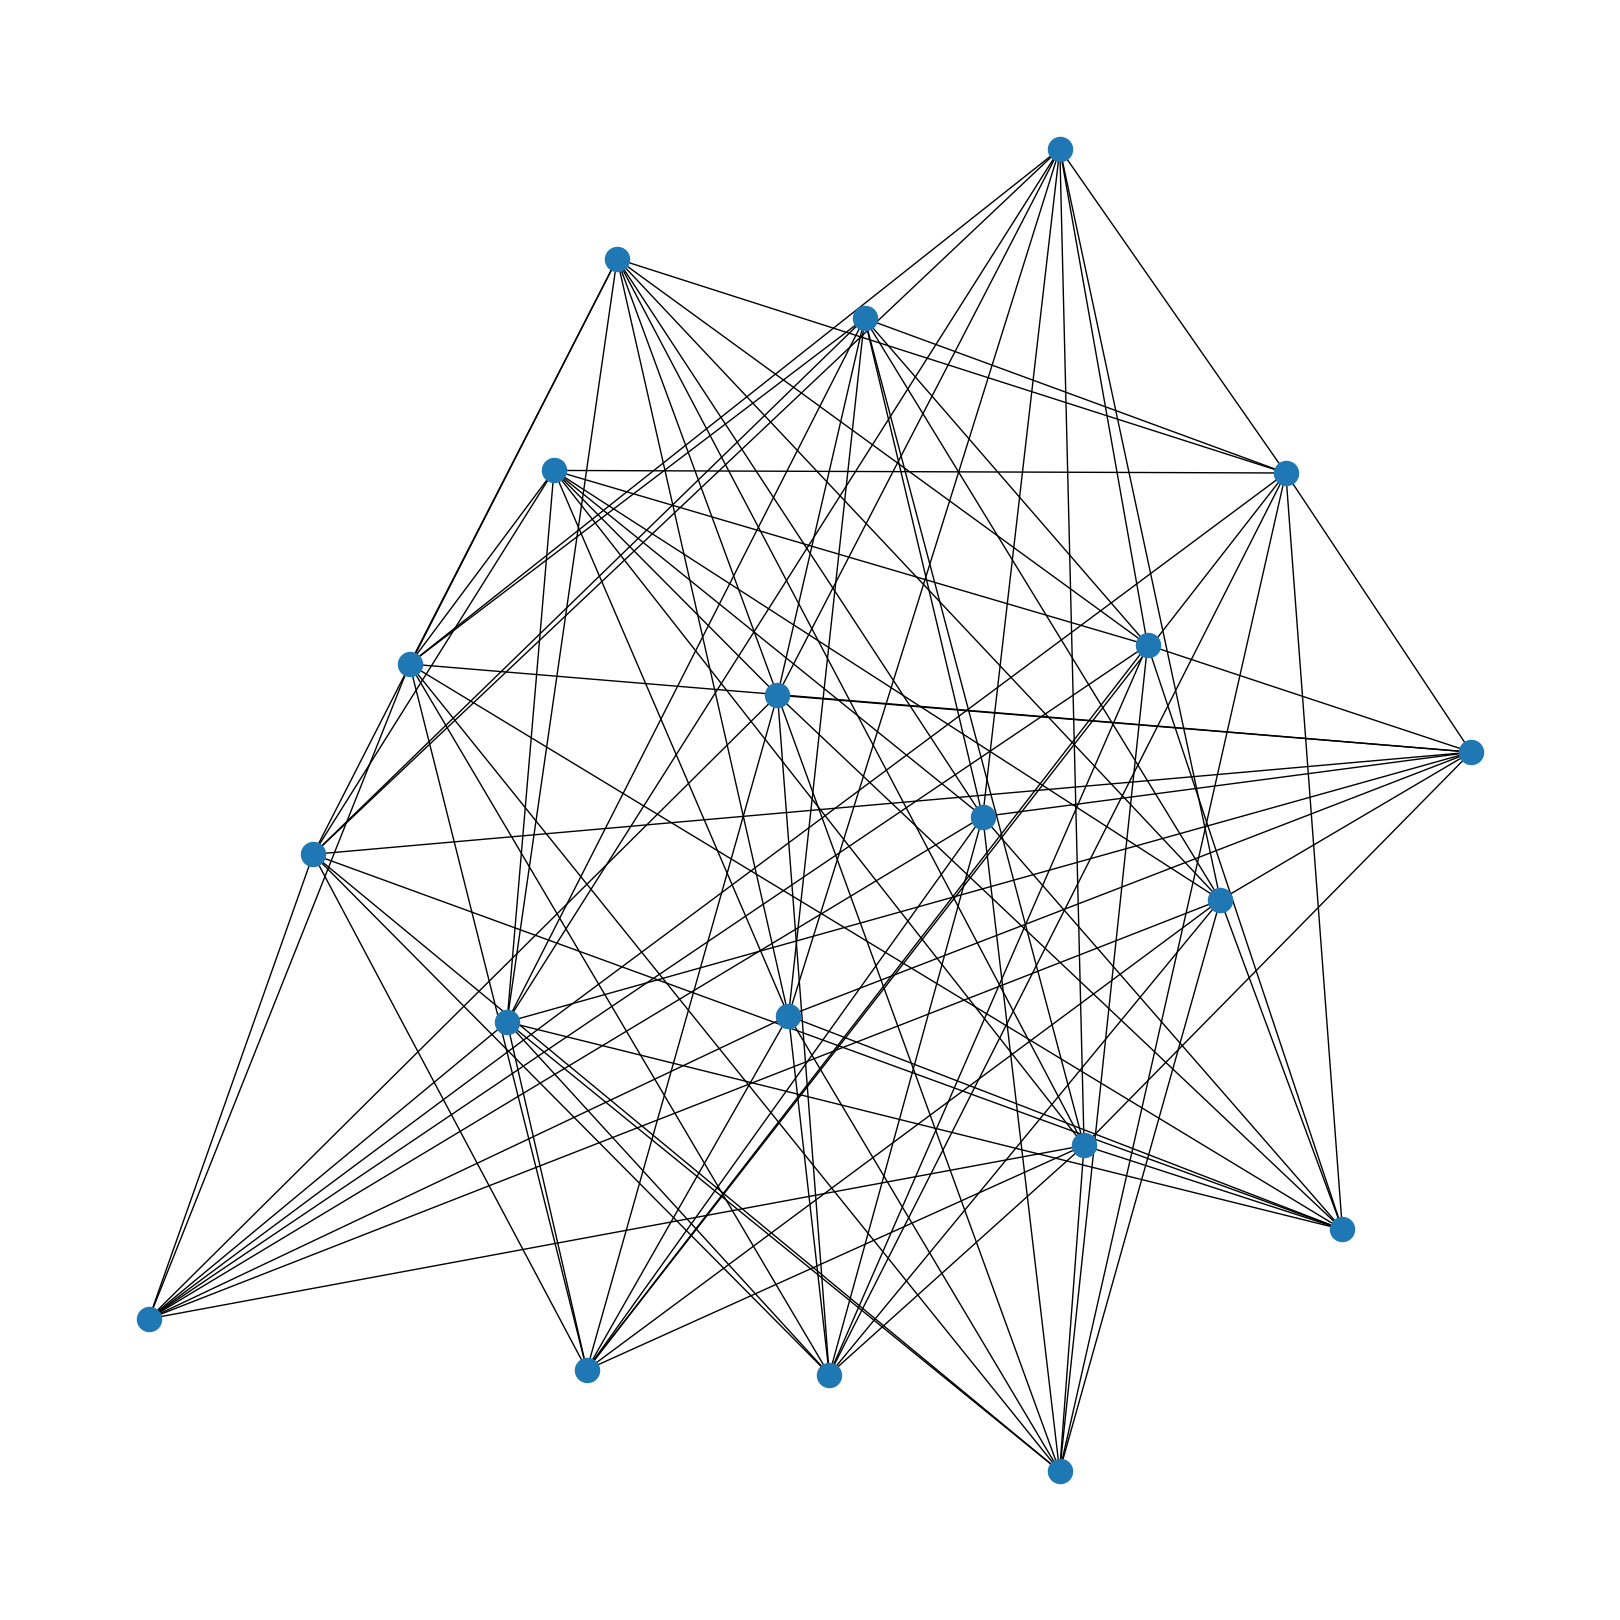

In [109]:
plt.figure(figsize=(16,16))
nx.draw(sim_G)

In [110]:
print(sim_G.nodes())

most_similar

ms_value = similarity_matrix.max(axis=1)
ms_value

y_tick = ['Topic-{}'.format(x+1) for x in range(10)]
x_tick = ['Topic-{}'.format(x+1) for x in range(10)]

sns.set(font_scale=2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [111]:
# Second VS Third Wave

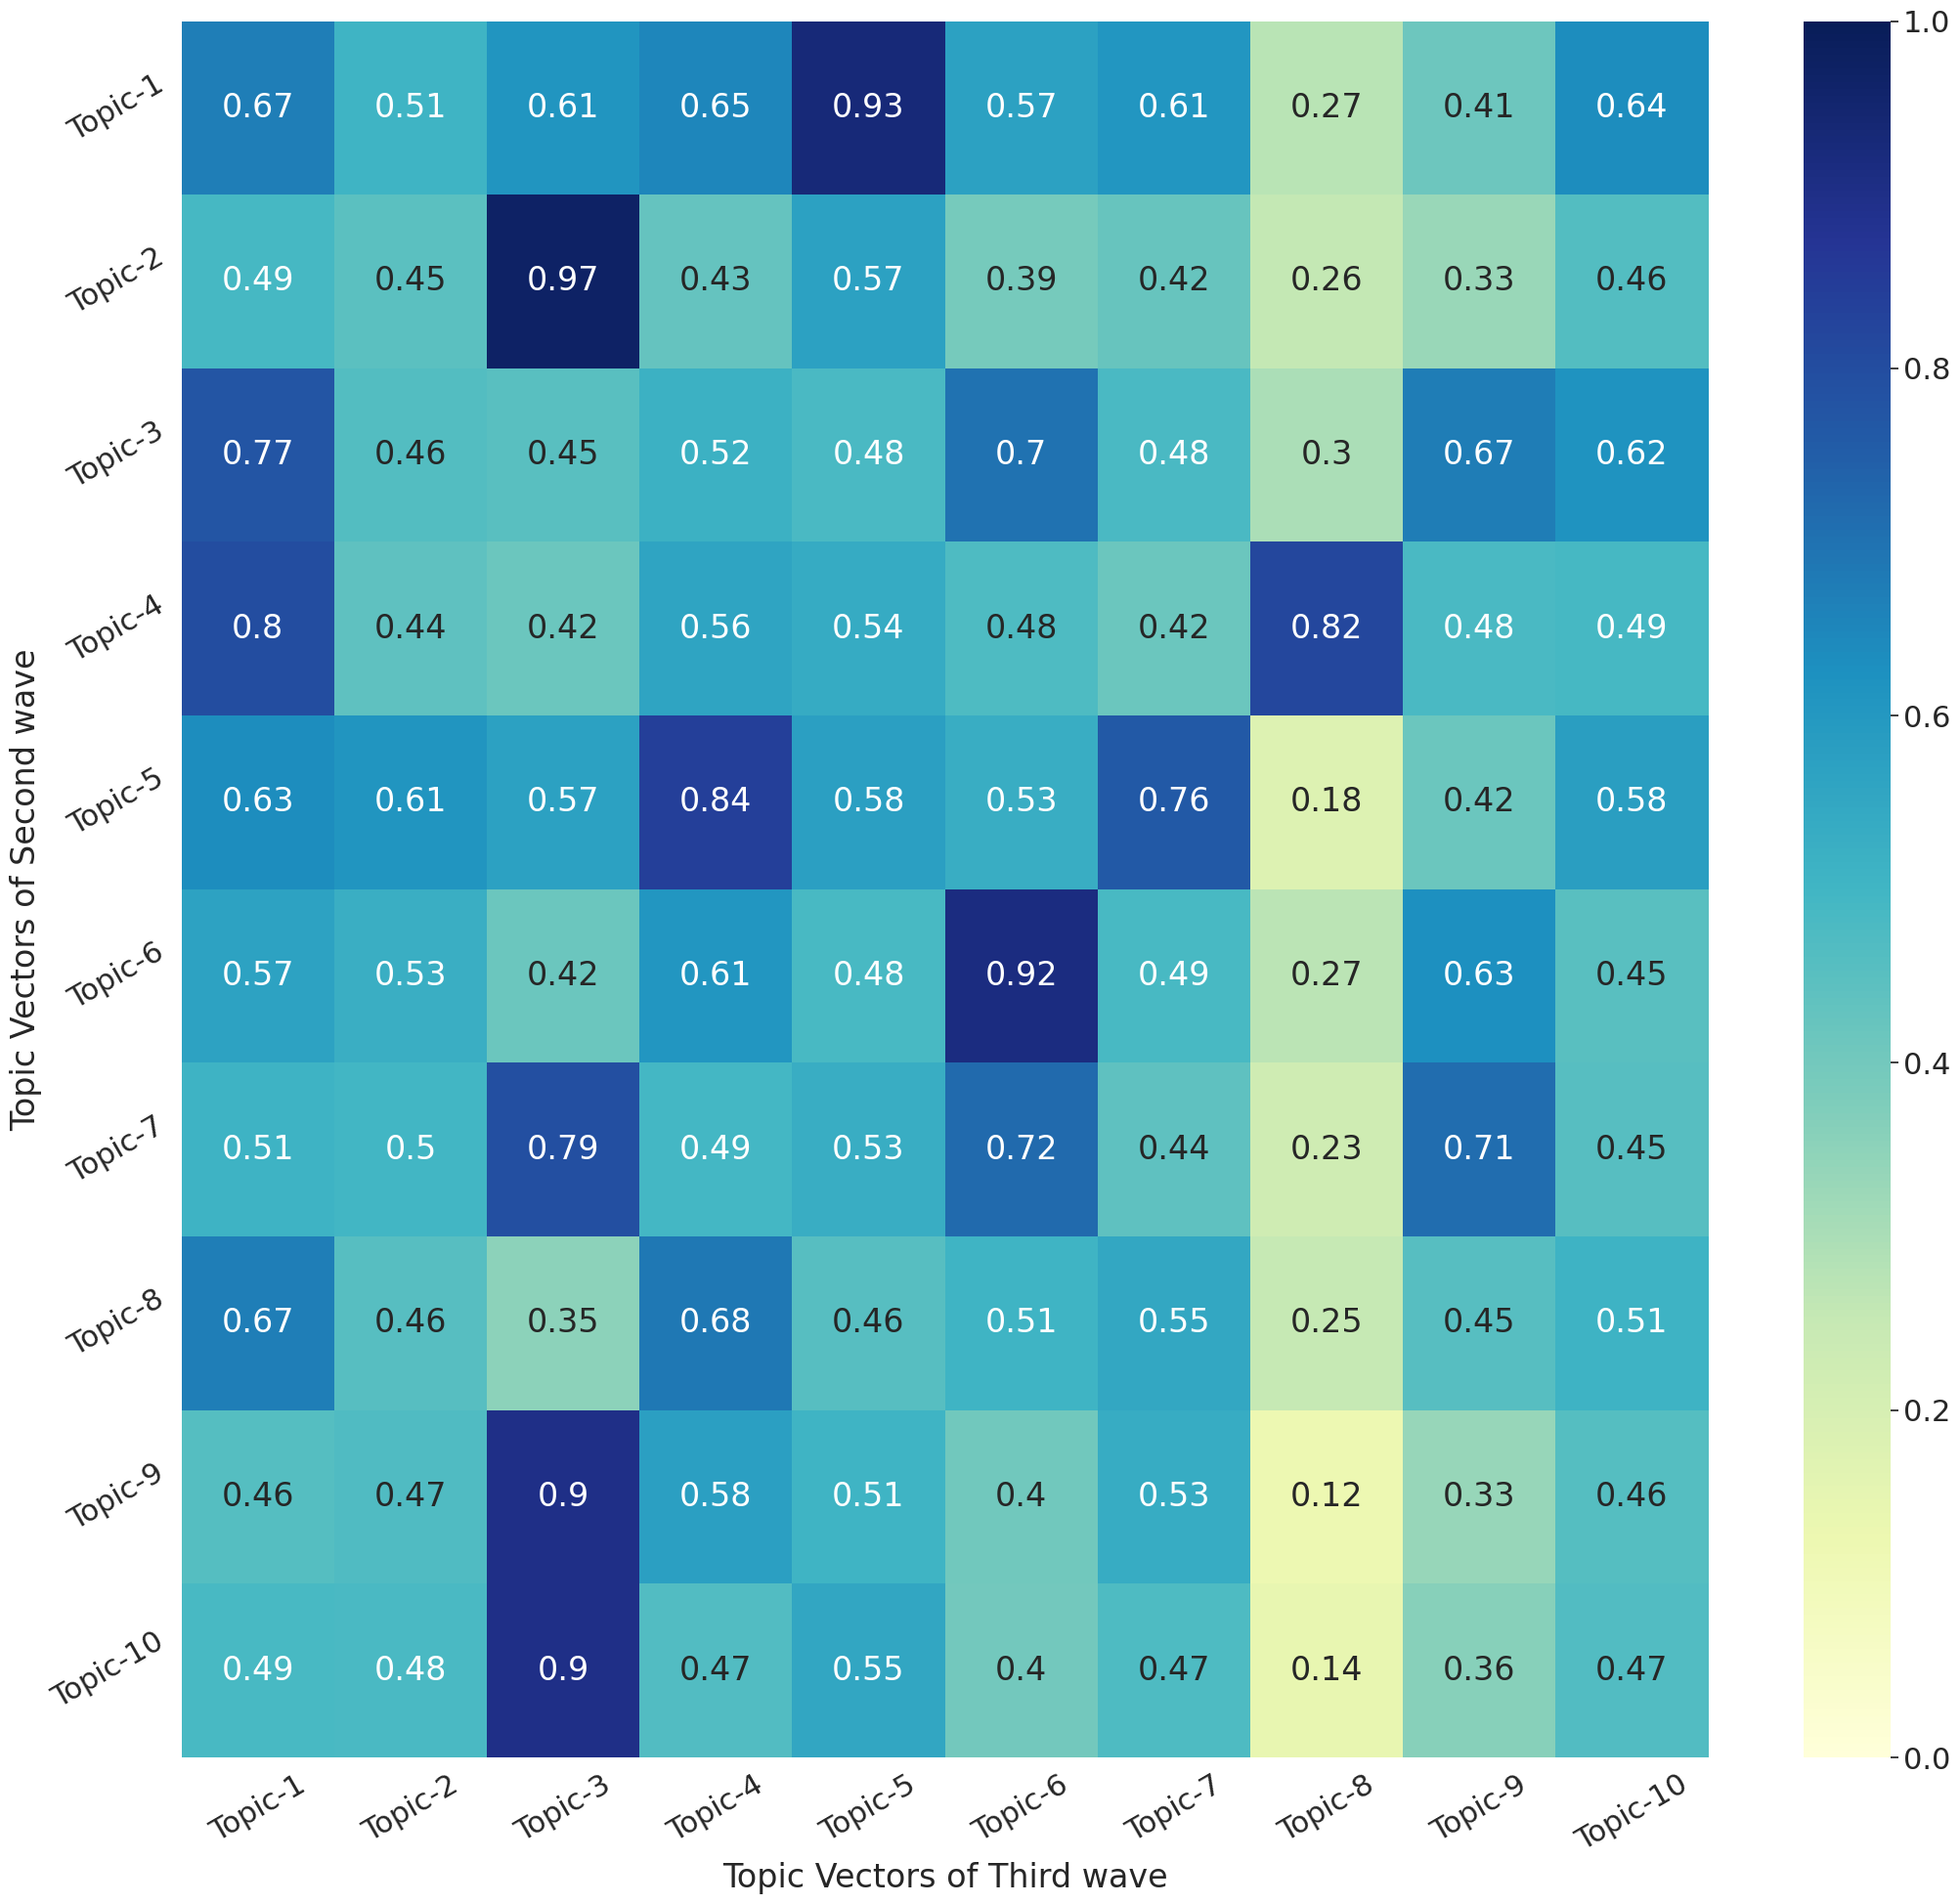

In [112]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of Second wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [113]:
def get_words(model, num_words = 20, num_topics = 10):
    """
    get n random words from each topics
    """
    reduced_flag = False
    if model.get_num_topics() > num_topics:
      reduced_topic_lists = model.hierarchical_topic_reduction(num_topics = num_topics)
      reduced_flag = True

    topic_words, word_scores, topic_nums = model.get_topics(reduced=reduced_flag)

    return topic_words[:,:num_words], word_scores[:,:num_words], topic_nums

In [114]:
words_secondwave, _, _= get_words(model_second_reduced, 10, model_second_reduced.get_num_topics())
words_thirdwave, _, _ = get_words(model_third_reduced, 10, model_third_reduced.get_num_topics())
words_secondwave

array([['vaccinate', 'vaccine', 'vaccinations', 'vaccines', 'vaccinated',
        'vaccination', 'shots', 'jab', 'immunity', 'flu'],
       ['pandemic', 'outbreak', 'quarantine', 'flu', 'vaccinate',
        'crisis', 'risk', 'virus', 'vaccinated', 'vaccine'],
       ['vaccinate', 'vaccinations', 'vaccination', 'vaccinated',
        'vaccines', 'vaccine', 'australians', 'australia', 'queensland',
        'qld'],
       ['seriously', 'bad', 'good', 'wrong', 'forget', 'waiting',
        'really', 'auspol', 'huge', 'jobkeeper'],
       ['vaccine', 'vaccinate', 'vaccination', 'vaccinations',
        'vaccines', 'vaccinated', 'jab', 'rollout', 'shots', 'flu'],
       ['quarantine', 'pandemic', 'outbreak', 'vaccinated', 'vaccinate',
        'vaccinations', 'passports', 'vaccination', 'vaccine', 'virus'],
       ['friday', 'happy', 'monday', 'may', 'yesterday', 'update',
        'party', 'sure', 'tomorrow', 'agree'],
       ['lockdown', 'lockdowns', 'secured', 'close', 'safe', 'safety',
      

In [115]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [116]:
df3 = pd.DataFrame({"Topics of Second Wave":[','.join(list(x)) for x in words_second], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df3

,Topics of Second Wave,Most Similar topics in Third Wave,Similarity Score
0,"pandemic,quarantine,outbreak,flu,vaccinate,vir...","pandemic,sars,quarantine,outbreak,flu,unvaccin...",0.932448
1,"vaccinate,vaccinations,vaccines,vaccine,vaccin...","vaccinations,vaccinated,vaccines,vaccination,v...",0.969412
2,"biden,lnp,republicans,gov,trump,liberal,govt,g...","lockdown,fuck,twitter,misinformation,dickhead,...",0.774643
3,"lockdown,seriously,bad,really,wrong,enough,mas...","dickhead,fuck,shit,uncontrolled,bad,seriously,...",0.820077
4,"outbreak,quarantine,vaccinate,patients,vaccina...","sars,deaths,rip,icu,illness,yesterday,seriousl...",0.843054
5,"queensland,australians,qld,nsw,australia,melbo...","lnp,abbott,queensland,qld,australians,nsw,aust...",0.915376
6,"vaccinate,vaccinations,vaccines,vaccination,va...","vaccinations,vaccinated,vaccines,vaccination,v...",0.793739
7,"friday,monday,working,work,yesterday,already,h...","sars,deaths,rip,icu,illness,yesterday,seriousl...",0.684343
8,"vaccinate,vaccination,vaccinated,vaccinations,...","vaccinations,vaccinated,vaccines,vaccination,v...",0.900564
9,"vaccinate,vaccine,vaccines,vaccinations,vaccin...","vaccinations,vaccinated,vaccines,vaccination,v...",0.901518


In [117]:
df3.to_csv('df3.csv')

In [118]:
# First VS Third wave

In [119]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_thirdwave)
most_similar = similarity_matrix.argmax(axis=1)

ms_value = similarity_matrix.max(axis=1)

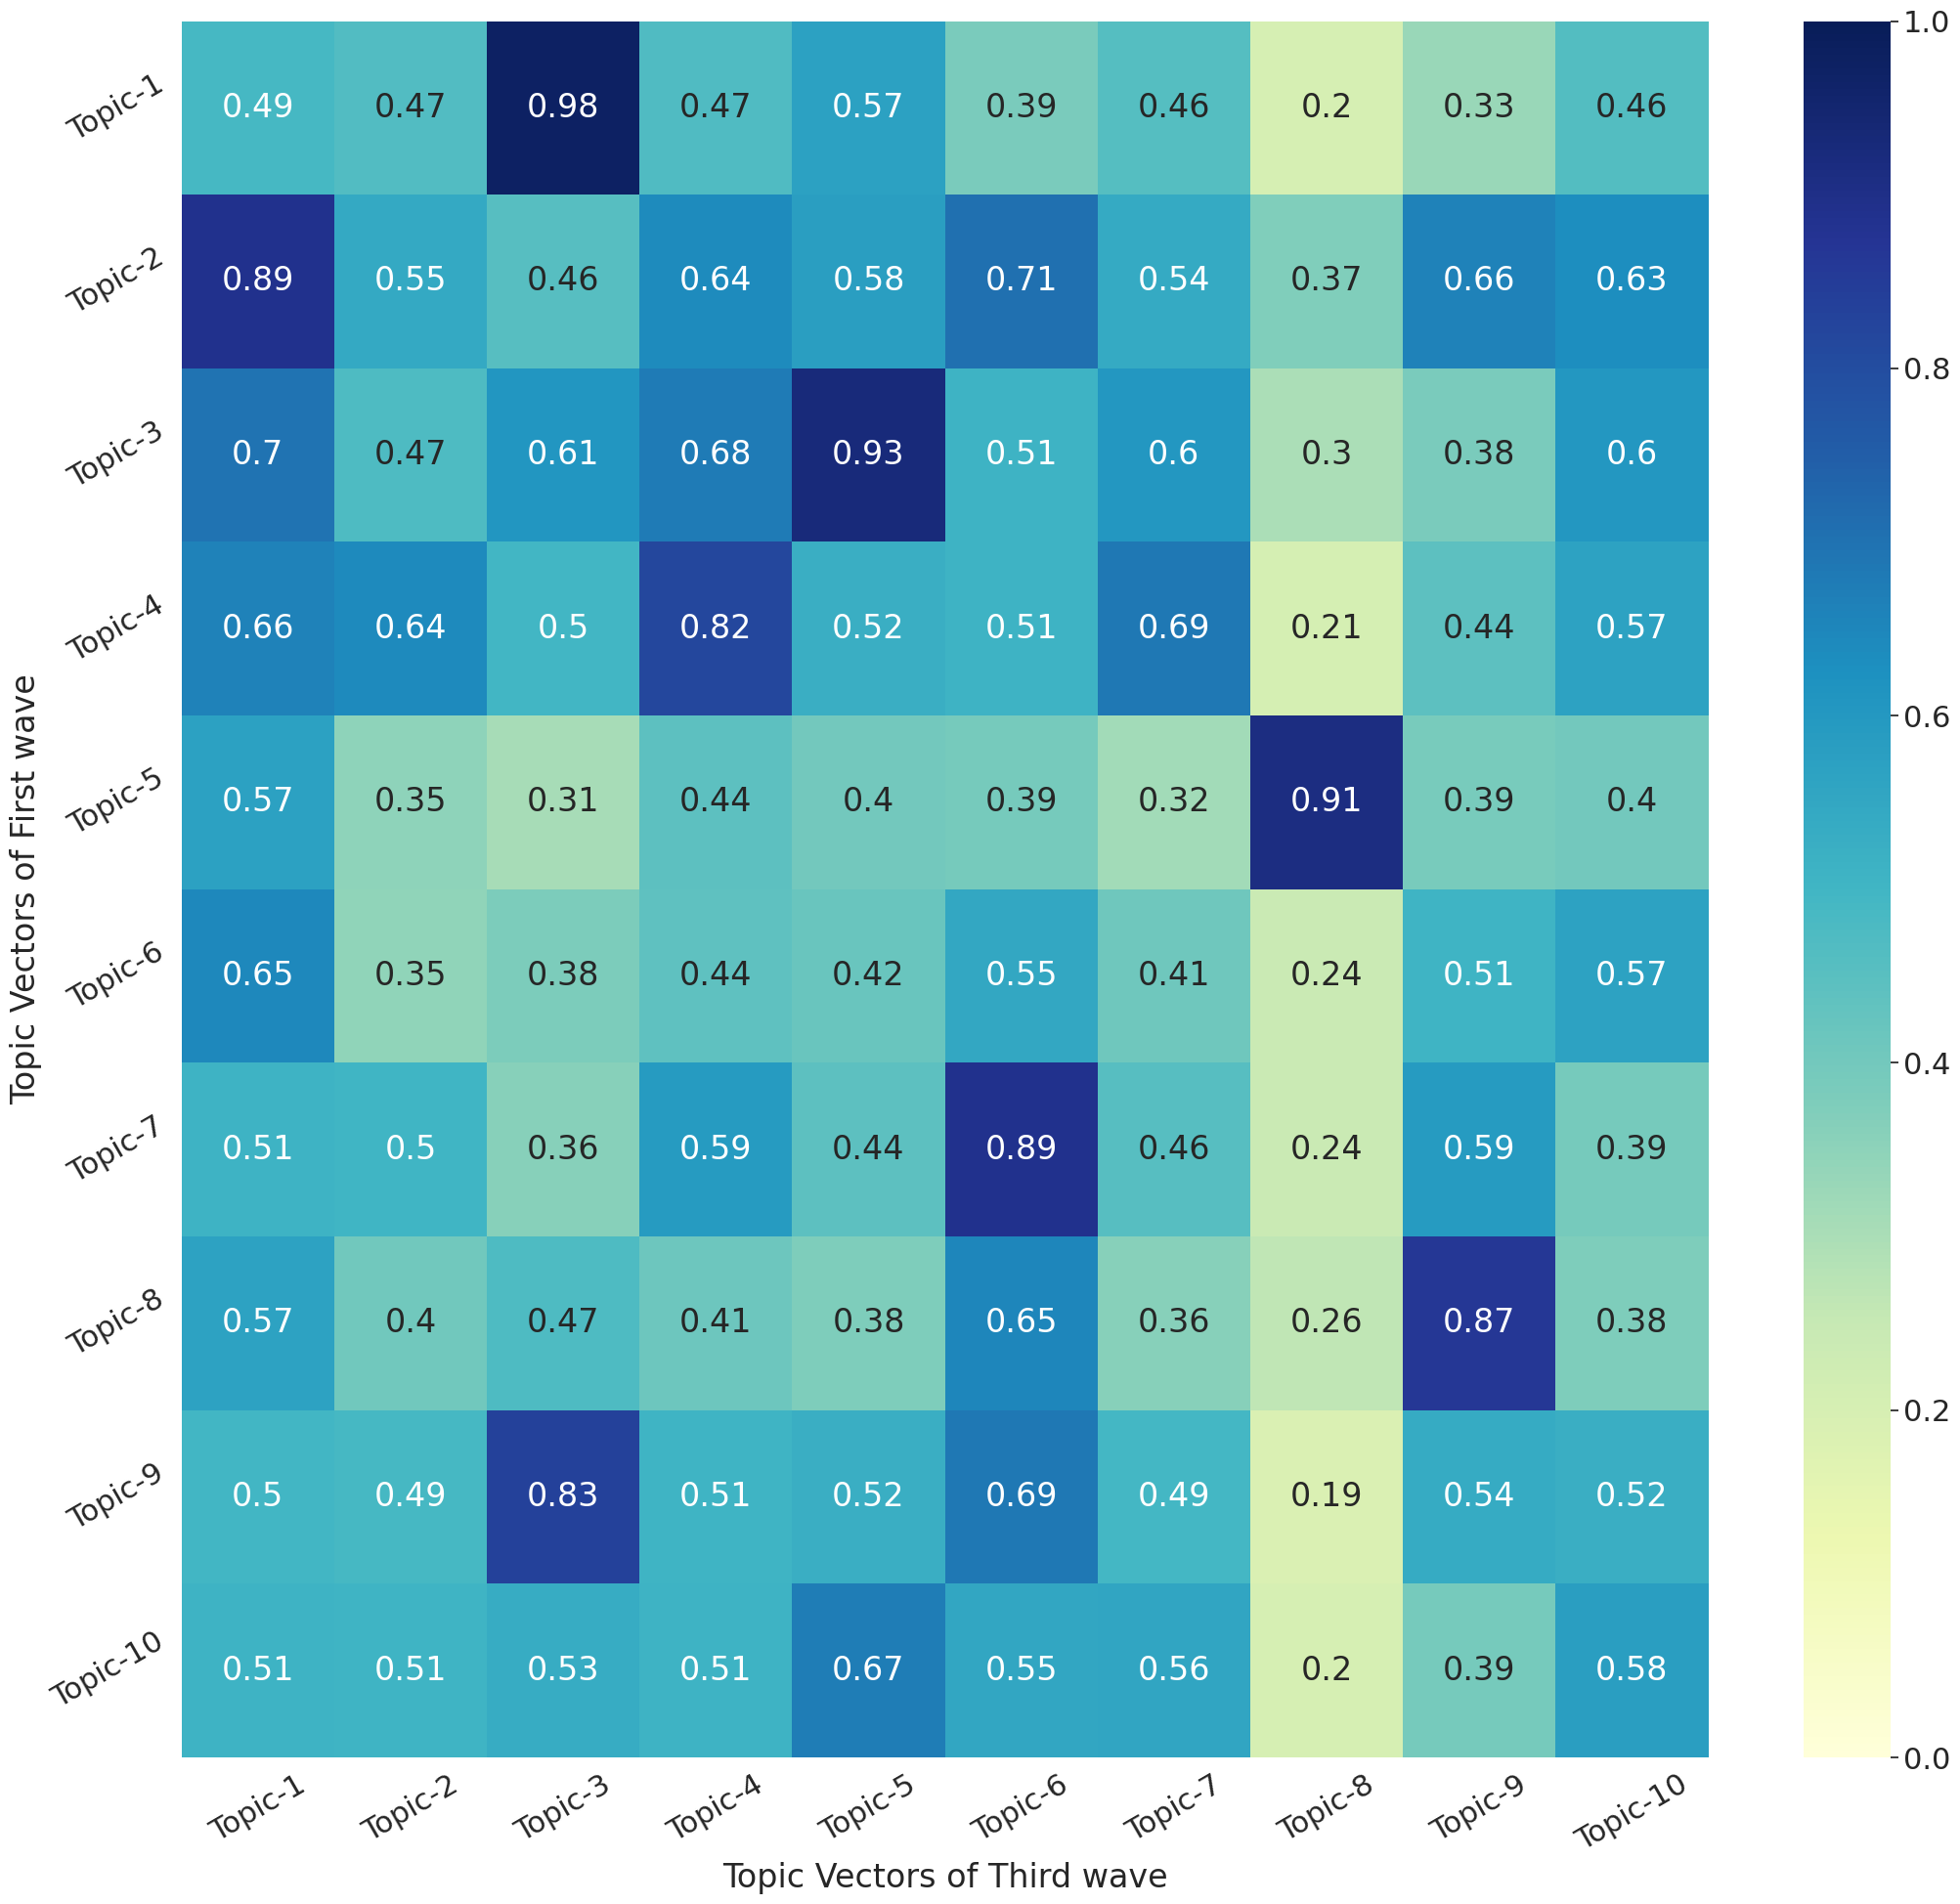

In [120]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Third wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [121]:
mstg = []
for x in most_similar:
  mstg.append(words_third[x])
len(mstg)

10

In [122]:
df2 = pd.DataFrame({"Topics of First Wave":[','.join(list(x)) for x in words_first], "Most Similar topics in Third Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df2.to_csv('df2.csv')
df2

,Topics of First Wave,Most Similar topics in Third Wave,Similarity Score
0,"vaccines,vaccinations,vaccine,vaccinated,vacci...","vaccinations,vaccinated,vaccines,vaccination,v...",0.975277
1,"lockdown,lnp,gov,govt,misinformation,really,bi...","lockdown,fuck,twitter,misinformation,dickhead,...",0.888576
2,"pandemic,outbreak,quarantine,flu,risk,deaths,c...","pandemic,sars,quarantine,outbreak,flu,unvaccin...",0.929471
3,"update,tested,outbreak,new,positive,news,worki...","sars,deaths,rip,icu,illness,yesterday,seriousl...",0.818783
4,"happy,sick,worst,bad,good,enough,wrong,lies,ba...","dickhead,fuck,shit,uncontrolled,bad,seriously,...",0.910950
5,"biden,republicans,trump,senate,lnp,liberal,gov...","lockdown,fuck,twitter,misinformation,dickhead,...",0.646326
6,"queensland,nsw,perth,melbourne,brisbane,austra...","lnp,abbott,queensland,qld,australians,nsw,aust...",0.888328
7,"morrison,craig,lnp,kelly,greg,scott,queensland...","morrison,abbott,lnp,qld,queensland,scott,harve...",0.865501
8,"vaccinations,vaccinated,vaccination,vaccines,v...","vaccinations,vaccinated,vaccines,vaccination,v...",0.832616
9,"quarantine,pandemic,outbreak,vaccinated,vaccin...","pandemic,sars,quarantine,outbreak,flu,unvaccin...",0.672499


In [123]:
# first second wave

In [124]:
topic_vectors_firstwave = model_first_reduced.topic_vectors_reduced
topic_vectors_secondwave = model_second_reduced.topic_vectors_reduced
print(topic_vectors_firstwave.shape, topic_vectors_secondwave.shape)

(10, 512) (10, 512)


In [125]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(topic_vectors_firstwave, topic_vectors_secondwave)
most_similar = similarity_matrix.argmax(axis=1)

ms_value = similarity_matrix.max(axis=1)

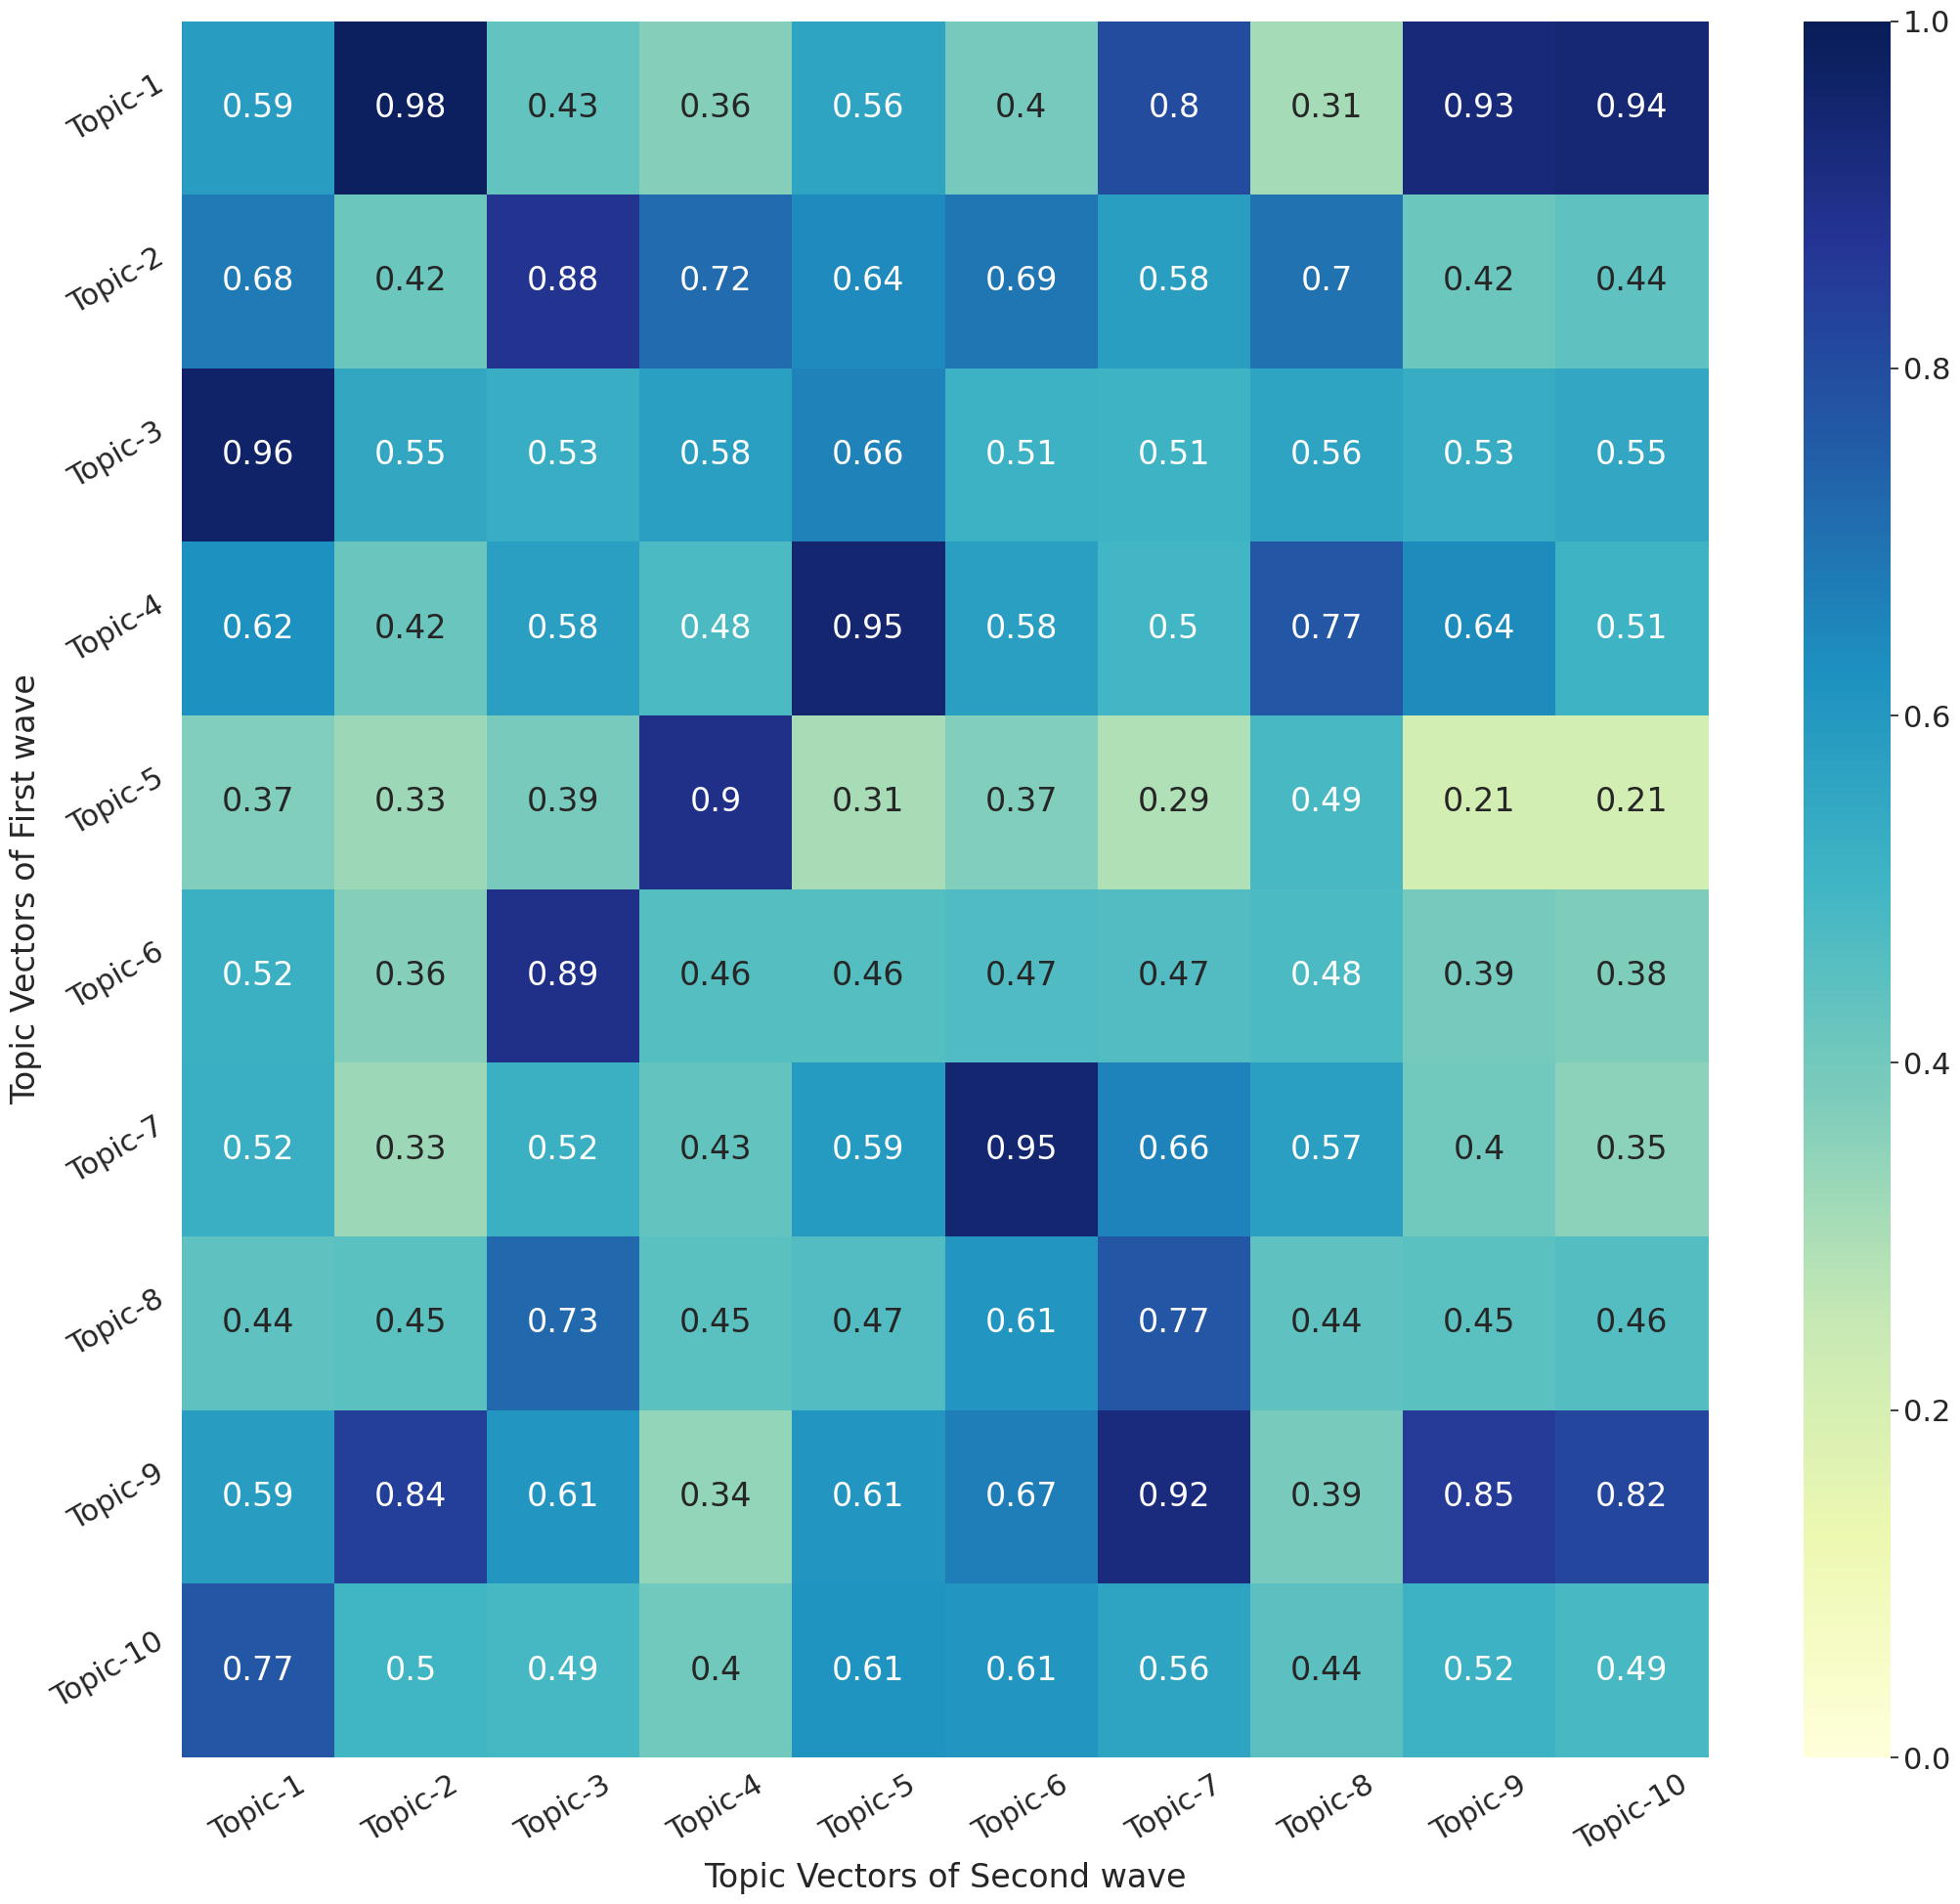

In [126]:
fig = plt.figure(figsize=(22, 20))
cmap = sns.cm.rocket_r
hm = sns.heatmap(similarity_matrix, annot=True, vmin=0, vmax=1, xticklabels=True, yticklabels=True, cmap = "YlGnBu")
_ = hm.set_xticklabels(x_tick, rotation=30)
_ =  hm.set_yticklabels(y_tick, rotation=30)
plt.xlabel("Topic Vectors of Second wave")
plt.ylabel("Topic Vectors of First wave")
plt.tight_layout()
plt.savefig("heatmap.pdf", bbox_inches = 'tight',dpi = 150, facecolor=fig.get_facecolor(), edgecolor='none')

In [127]:
mstg = []
for x in most_similar:
  mstg.append(words_second[x])
len(mstg)

10

In [128]:
df1 = pd.DataFrame({"Topics of First Wave(top 10 words)":[','.join(list(x)) for x in words_first], "Most Similar topics in Second Wave": [','.join(list(x)) for x in mstg], "Similarity Score": list(ms_value)})
df1.to_csv('df1.csv')

In [129]:
df1

,Topics of First Wave(top 10 words),Most Similar topics in Second Wave,Similarity Score
0,"vaccines,vaccinations,vaccine,vaccinated,vacci...","vaccinate,vaccinations,vaccines,vaccine,vaccin...",0.981033
1,"lockdown,lnp,gov,govt,misinformation,really,bi...","biden,lnp,republicans,gov,trump,liberal,govt,g...",0.881492
2,"pandemic,outbreak,quarantine,flu,risk,deaths,c...","pandemic,quarantine,outbreak,flu,vaccinate,vir...",0.961093
3,"update,tested,outbreak,new,positive,news,worki...","outbreak,quarantine,vaccinate,patients,vaccina...",0.949985
4,"happy,sick,worst,bad,good,enough,wrong,lies,ba...","lockdown,seriously,bad,really,wrong,enough,mas...",0.898413
5,"biden,republicans,trump,senate,lnp,liberal,gov...","biden,lnp,republicans,gov,trump,liberal,govt,g...",0.894992
6,"queensland,nsw,perth,melbourne,brisbane,austra...","queensland,australians,qld,nsw,australia,melbo...",0.948918
7,"morrison,craig,lnp,kelly,greg,scott,queensland...","vaccinate,vaccinations,vaccines,vaccination,va...",0.770559
8,"vaccinations,vaccinated,vaccination,vaccines,v...","vaccinate,vaccinations,vaccines,vaccination,va...",0.920828
9,"quarantine,pandemic,outbreak,vaccinated,vaccin...","pandemic,quarantine,outbreak,flu,vaccinate,vir...",0.771861


In [130]:
from google.colab import files
df1.to_csv('AUS_df1.csv')
files.download('AUS_df1.csv')

df2.to_csv('AUS_df2.csv')
files.download('AUS_df2.csv')

df3.to_csv('AUS_df3.csv')
files.download('AUS_df3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>